In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import display, HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text

# scrollable output
styles += """
<style>
    div.output_scroll { 
        height: 300px; 
        overflow-y: auto;
    }
    
    div.output_wrapper {
        overflow-x: auto;
    }
</style>
"""
HTML(styles)

/var/folders/9c/7d5d4vv50tlg0qp7ks_m2mtc0000gn/T/ipykernel_94100/1233485917.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [3]:
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
                            

In [4]:

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [5]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

In [6]:
# set settings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)
sns.set_palette("husl")
seed = 109

# load and rename data
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")

column_mapping = {
    'Marital status': 'marital_status',
    'Application mode': 'app_mode',
    'Application order': 'app_order',
    'Course': 'course',
    'Daytime/evening attendance': 'daytime',
    'Previous qualification': 'prev_qual',
    'Previous qualification (grade)': 'prev_qual_grade',
    'Nationality': 'nationality',
    "Mother's qualification": 'mother_qual',
    "Father's qualification": 'father_qual',
    "Mother's occupation": 'mother_occ',
    "Father's occupation": 'father_occ',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'tuition_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship',
    'Age at enrollment': 'age',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'sem1_credited',
    'Curricular units 1st sem (enrolled)': 'sem1_enrolled',
    'Curricular units 1st sem (evaluations)': 'sem1_evaluations',
    'Curricular units 1st sem (approved)': 'sem1_approved',
    'Curricular units 1st sem (grade)': 'sem1_grade',
    'Curricular units 1st sem (without evaluations)': 'sem1_without_eval',
    'Curricular units 2nd sem (credited)': 'sem2_credited',
    'Curricular units 2nd sem (enrolled)': 'sem2_enrolled',
    'Curricular units 2nd sem (evaluations)': 'sem2_evaluations',
    'Curricular units 2nd sem (approved)': 'sem2_approved',
    'Curricular units 2nd sem (grade)': 'sem2_grade',
    'Curricular units 2nd sem (without evaluations)': 'sem2_without_eval',
    'Unemployment rate': 'unemployment',
    'Inflation rate': 'inflation',
    'GDP': 'gdp',
    'Target': 'target'
}

X_train = X_train.rename(columns=column_mapping)
X_test = X_test.rename(columns=column_mapping)
y_train = y_train.rename(columns=column_mapping)

df_train = X_train.copy()
df_train['target'] = y_train

In [7]:
display(X_train.head(10))
print("Here is a set of all the columns in X_train, i.e. our predictors, after renaming:")
print(X_train.columns)

,marital_status,app_mode,app_order,course,daytime,prev_qual,prev_qual_grade,nationality,mother_qual,father_qual,mother_occ,father_occ,admission_grade,displaced,special_needs,debtor,tuition_up_to_date,gender,scholarship,age,international,sem1_credited,sem1_enrolled,sem1_evaluations,sem1_approved,sem1_grade,sem1_without_eval,sem2_credited,sem2_enrolled,sem2_evaluations,sem2_approved,sem2_grade,sem2_without_eval,unemployment,inflation,gdp
0,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
1,1,17,2,9147,1,1,122.0,1,19,19,7,7,116.1,1,0,0,1,0,1,19,0,0,5,8,5,11.200000,0,0,5,5,3,11.000000,0,12.4,0.5,1.79
2,1,17,3,9670,1,1,123.0,1,38,38,7,8,118.8,1,1,0,1,0,1,18,0,0,6,10,5,12.000000,0,0,6,11,5,12.333333,0,11.1,0.6,2.02
3,1,39,1,9500,1,19,133.1,1,38,38,9,9,114.8,0,0,0,1,0,0,28,0,0,7,15,1,10.750000,0,0,7,10,1,10.000000,0,13.9,-0.3,0.79
4,2,7,1,9254,1,2,100.0,1,37,37,9,9,100.0,0,0,0,0,0,0,37,0,0,5,5,0,0.000000,0,0,5,10,0,0.000000,0,10.8,1.4,1.74
5,1,17,1,9670,1,1,155.0,1,1,19,4,8,134.7,1,0,0,1,0,0,20,0,0,6,8,5,13.400000,0,0,6,10,4,13.000000,0,12.7,3.7,-1.70
6,1,43,1,9147,1,1,133.1,1,4,19,2,1,128.2,0,0,0,1,0,0,23,0,7,11,18,11,15.090909,1,2,6,7,6,14.500000,0,9.4,-0.8,-3.12
7,1,17,3,9853,1,1,132.0,1,34,34,0,0,131.3,1,0,0,1,0,0,21,0,0,6,8,5,11.800000,0,0,6,8,4,10.500000,0,7.6,2.6,0.32
8,1,1,1,9119,1,1,130.0,1,37,19,9,5,140.2,1,0,0,1,1,0,20,0,0,5,5,0,0.000000,0,0,5,0,0,0.000000,0,9.4,-0.8,-3.12
9,1,44,1,9003,1,39,140.0,1,19,38,3,9,140.0,1,0,0,1,1,0,21,0,0,6,7,6,12.857143,0,0,6,6,6,13.166667,0,12.4,0.5,1.79


Here is a set of all the columns in X_train, i.e. our predictors, after renaming:
Index(['marital_status', 'app_mode', 'app_order', 'course', 'daytime',
       'prev_qual', 'prev_qual_grade', 'nationality', 'mother_qual',
       'father_qual', 'mother_occ', 'father_occ', 'admission_grade',
       'displaced', 'special_needs', 'debtor', 'tuition_up_to_date', 'gender',
       'scholarship', 'age', 'international', 'sem1_credited', 'sem1_enrolled',
       'sem1_evaluations', 'sem1_approved', 'sem1_grade', 'sem1_without_eval',
       'sem2_credited', 'sem2_enrolled', 'sem2_evaluations', 'sem2_approved',
       'sem2_grade', 'sem2_without_eval', 'unemployment', 'inflation', 'gdp'],
      dtype='object')


In [8]:
display(y_train.head(10))
print("Here is a set of all the columns in y_train, i.e. our response variable: ")
print(set(y_train.columns))

# get counts of each class
print("Here are the counts for each class: ")
y_train.value_counts()

,target
0,Graduate
1,Graduate
2,Graduate
3,Dropout
4,Dropout
5,Enrolled
6,Dropout
7,Dropout
8,Dropout
9,Graduate


Here is a set of all the columns in y_train, i.e. our response variable: 
{'target'}
Here are the counts for each class: 


target  
Graduate    1657
Dropout     1066
Enrolled     595
Name: count, dtype: int64

Notice that this is a case of class imbalance. The 'enrolled' class is significantly underrepresented compared to both the 'graduate' and 'dropout' classes. This imbalance could cause the model to bias towards predicting the majority classes, particularly 'graduate'. To address this, we may need to use techniques like class weights or SMOTE to ensure the model learns to identify the minority 'enrolled' class effectively and doesn't simply optimize overall accuracy by focusing on the larger classes.

To conduct a full EDA, I will split the predictors into three categories, each of which I believe are likely to impact student outcomes after the course is finished.
- Category 1: Demographic predictors. This category includes this like age, gender, marital status, nationality, and whether the student requires special needs.
- Category 2: Economic predictors. This category includes information about a student's socioeconomic status, like the parents' employment, the amount of debt they have, etc.
- Category 3: Academic predictors. This category includes information about a student's academic performance, including grades before application, grades after the first semester, and grades after the second semester.

I produce tables and pairplots for all three categories of predictors.

In [9]:
demographic_numeric = ['age']
demographic_categorical = ['gender', 'marital_status', 'special_needs', 'international', 'displaced']
demographic_predictors = demographic_numeric + demographic_categorical

economic_numeric = ['unemployment', 'inflation', 'gdp']
economic_categorical = ['mother_occ', 'father_occ', 'debtor', 'tuition_up_to_date', 'scholarship']
economic_predictors = economic_numeric + economic_categorical

academic_predictors = ['prev_qual_grade', 'admission_grade', 'sem1_grade', 'sem1_approved', 'sem1_enrolled', 'sem1_evaluations', 'sem2_grade', 'sem2_approved', 'sem2_enrolled', 'sem2_evaluations']

categorical_predictors = demographic_categorical + economic_categorical
numeric_predictors = demographic_numeric + economic_numeric + academic_predictors
predictors = categorical_predictors + numeric_predictors

X_train = X_train[predictors]
X_test = X_test[predictors]

Note: categorical variables with more than two categories have their small categories lumped into "other" (or -1) using a threshold value of 5%. I.e. if there is a category with fewer than 5 percent of observations, that category gets merged into "other".

In [10]:
def lump_small_categories(series, threshold_pct = 5):
  """
  lump small categories into 'other'
  """
  # get percentages
  value_counts = series.value_counts(normalize=True) * 100
  small_categories = value_counts[value_counts < threshold_pct].index
  
  # create new series with lumped categories
  lumped_series = series.copy()
  lumped_series[lumped_series.isin(small_categories)] = -1
  
  return lumped_series

df_train["marital_status"] = lump_small_categories(df_train["marital_status"])
df_train["mother_occ"] = lump_small_categories(df_train["mother_occ"])
df_train["father_occ"] = lump_small_categories(df_train["father_occ"])
X_train["marital_status"] = lump_small_categories(X_train["marital_status"])
X_train["mother_occ"] = lump_small_categories(X_train["mother_occ"])
X_train["father_occ"] = lump_small_categories(X_train["father_occ"])
X_test["marital_status"] = lump_small_categories(X_test["marital_status"])
X_test["mother_occ"] = lump_small_categories(X_test["mother_occ"])
X_test["father_occ"] = lump_small_categories(X_test["father_occ"])

Here are summary tables and figures for the three different sets of predictors:

In [11]:
def summarize_numeric(df, numeric_cols):
  """
  create summary table for numeric variables
  """
  summary = df[numeric_cols].agg(['mean', 'std', 'min', 'max']).round(2)
  return summary.T

def summarize_categorical(df, cat_cols):
  """
  create summary table for categorical variables 
  """
  summary_rows = []
  
  for col in cat_cols:
    dist = (df[col].value_counts(normalize=True) * 100).round(2)
    summary_rows.append({
        'variable': col,
        'n_unique': df[col].nunique(),
        'distribution': dist.to_dict()
    })
      
  return pd.DataFrame(summary_rows)

In [12]:
def plot_numeric(df, x_name, y_name, ax, title=None, xlabel=None, ylabel=None, rotate_labels=45, violin_kwargs=None):
    if violin_kwargs is None:
        violin_kwargs = {}
    
    sns.violinplot(data=df, x=df[x_name], y=df[y_name], ax=ax, **violin_kwargs)
    
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=rotate_labels)
    
def plot_categorical(df, x_name, y_name, ax, title=None, value_map = None, xlabel=None, ylabel=None, rotate_labels=45, bar_kwargs=None):
    if bar_kwargs is None:
        bar_kwargs = {}
    
    if value_map is not None:
       y_values = df[y_name].map(value_map)
    else:
       y_values = df[y_name]
    
    # create crosstab with x classes as index and y as columns
    ct = pd.crosstab(index=df[x_name], columns=y_values, normalize='index') * 100
    
    
    # sort columns by size
    column_means = ct.mean()
    sorted_columns = column_means.sort_values().index
    ct = ct[sorted_columns]  # Reorder columns from smallest to largest
    
    ct.plot(kind='bar', stacked=True, ax=ax, **bar_kwargs)
    
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=rotate_labels)
    ax.legend(title=y_name)

In [13]:
print("SUMMARY: DEMOGRAPHIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, demographic_numeric))

print("\nCategorical Variables:")
print(summarize_categorical(df_train, demographic_categorical))

SUMMARY: DEMOGRAPHIC PREDICTORS
--------------------------------------------------

Numeric Variables:
      mean  std   min   max
age  23.25  7.6  17.0  70.0

Categorical Variables:
         variable  n_unique                  distribution
0          gender         2          {0: 64.92, 1: 35.08}
1  marital_status         3  {1: 89.0, 2: 8.32, -1: 2.68}
2   special_needs         2           {0: 98.82, 1: 1.18}
3   international         2           {0: 97.68, 1: 2.32}
4       displaced         2          {1: 54.67, 0: 45.33}


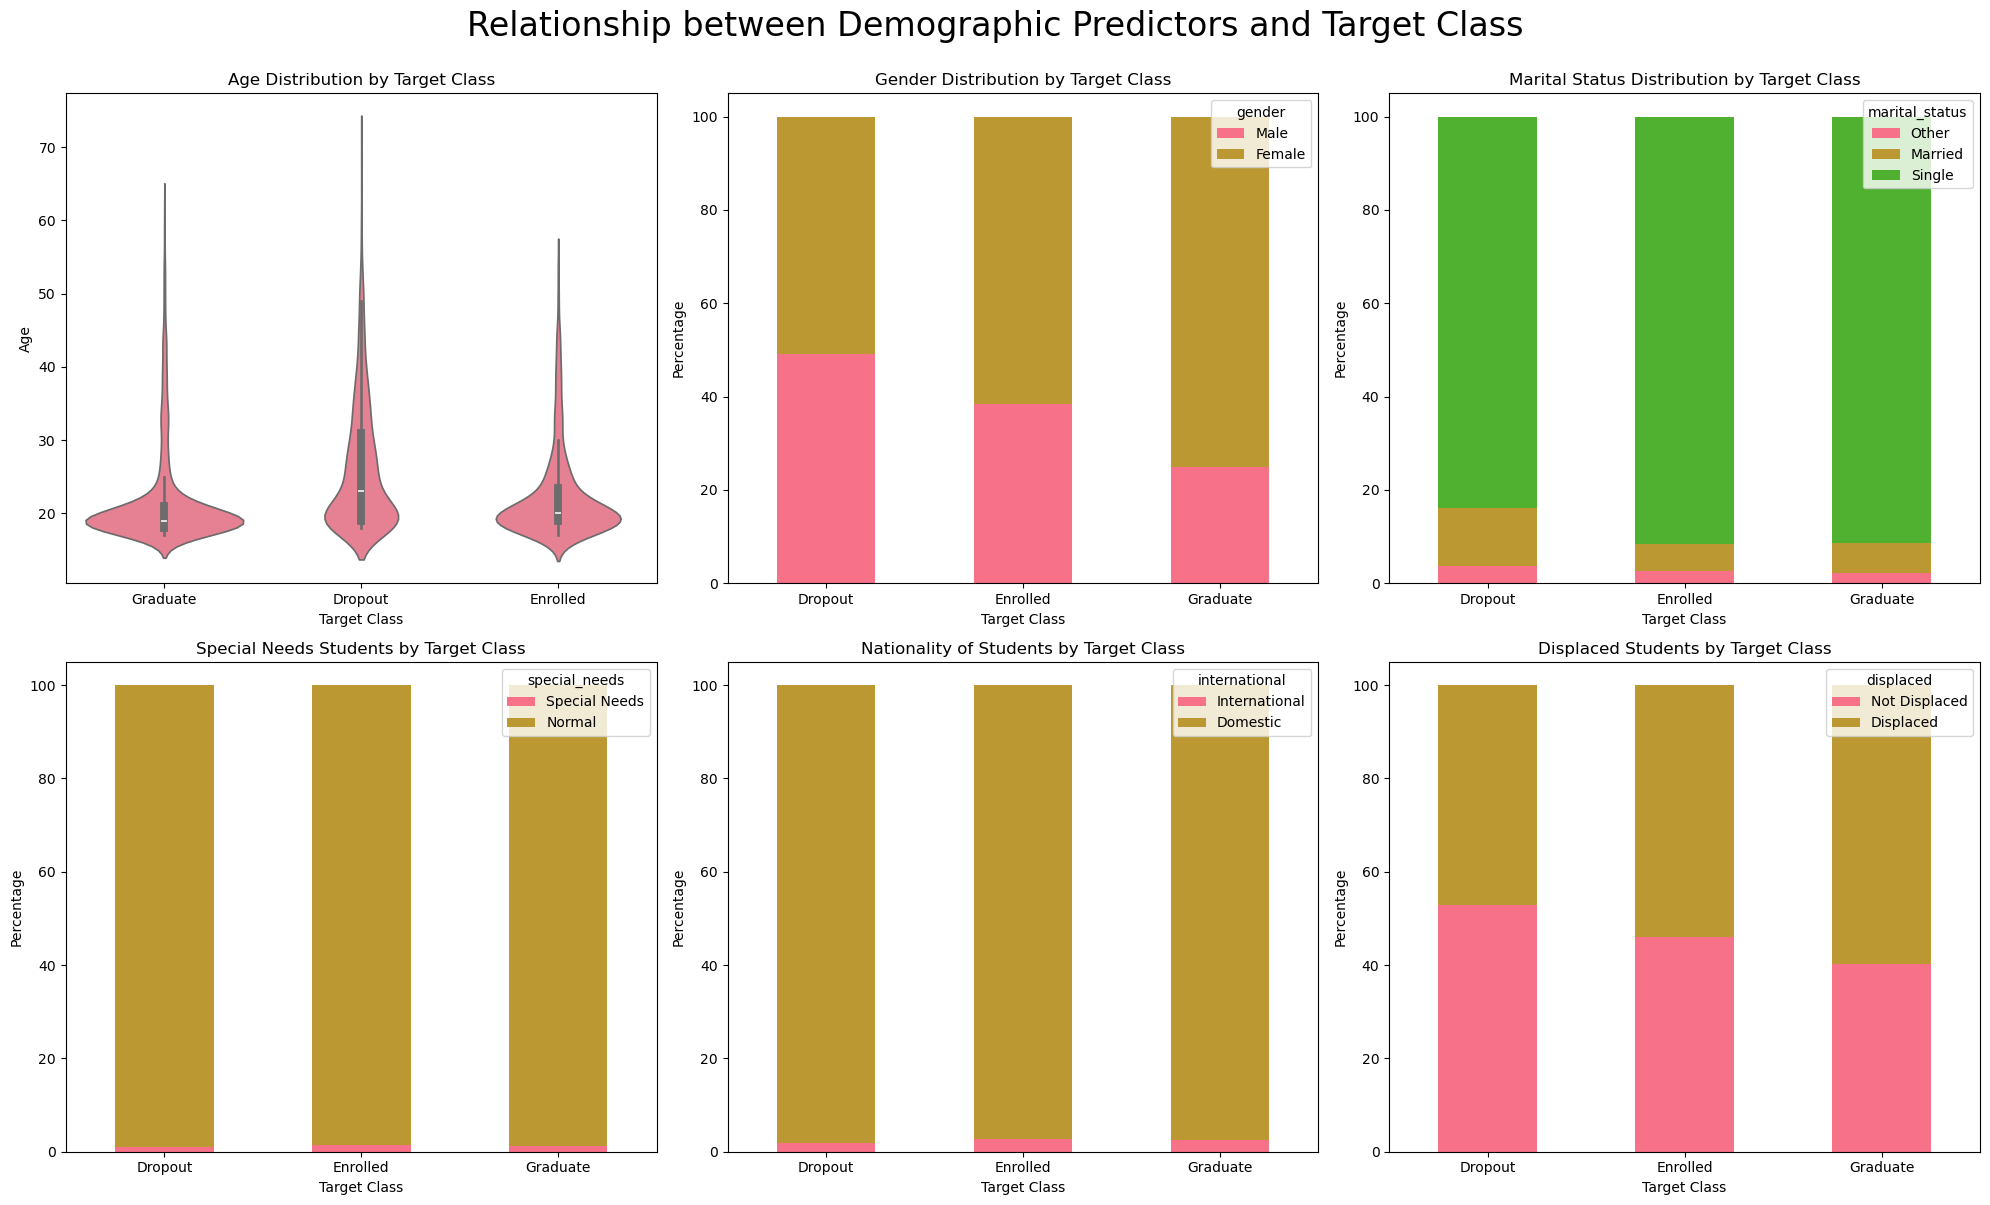

In [14]:
# subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Relationship between Demographic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "age", axes[0], title="Age Distribution by Target Class", xlabel="Target Class", ylabel="Age", rotate_labels=0, violin_kwargs=None)
plot_categorical(df_train, "target" , "gender", axes[1], title="Gender Distribution by Target Class", value_map={0: "Female", 1: "Male"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "marital_status", axes[2], title="Marital Status Distribution by Target Class", value_map={1: "Single", 2: "Married", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "special_needs", axes[3], title="Special Needs Students by Target Class", value_map={0: "Normal", 1: "Special Needs"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "international", axes[4], title="Nationality of Students by Target Class", value_map={0: "Domestic", 1: "International"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "displaced", axes[5], title="Displaced Students by Target Class", value_map={0: "Not Displaced", 1: "Displaced"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)

plt.tight_layout()
plt.show()

In [15]:
print("\nSUMMARY: ECONOMIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, economic_numeric))

print("\nCategorical Variables:")
print(summarize_categorical(df_train, economic_categorical))


SUMMARY: ECONOMIC PREDICTORS
--------------------------------------------------

Numeric Variables:
               mean   std   min    max
unemployment  11.59  2.67  7.60  16.20
inflation      1.22  1.38 -0.80   3.70
gdp            0.01  2.26 -4.06   3.51

Categorical Variables:
             variable  n_unique                                       distribution
0          mother_occ         7  {9: 35.74, 4: 18.47, -1: 12.33, 5: 12.24, 3: 7...
1          father_occ         9  {9: 22.94, -1: 14.62, 7: 14.32, 5: 11.57, 4: 8...
2              debtor         2                               {0: 88.73, 1: 11.27}
3  tuition_up_to_date         2                               {1: 88.03, 0: 11.97}
4         scholarship         2                               {0: 74.83, 1: 25.17}


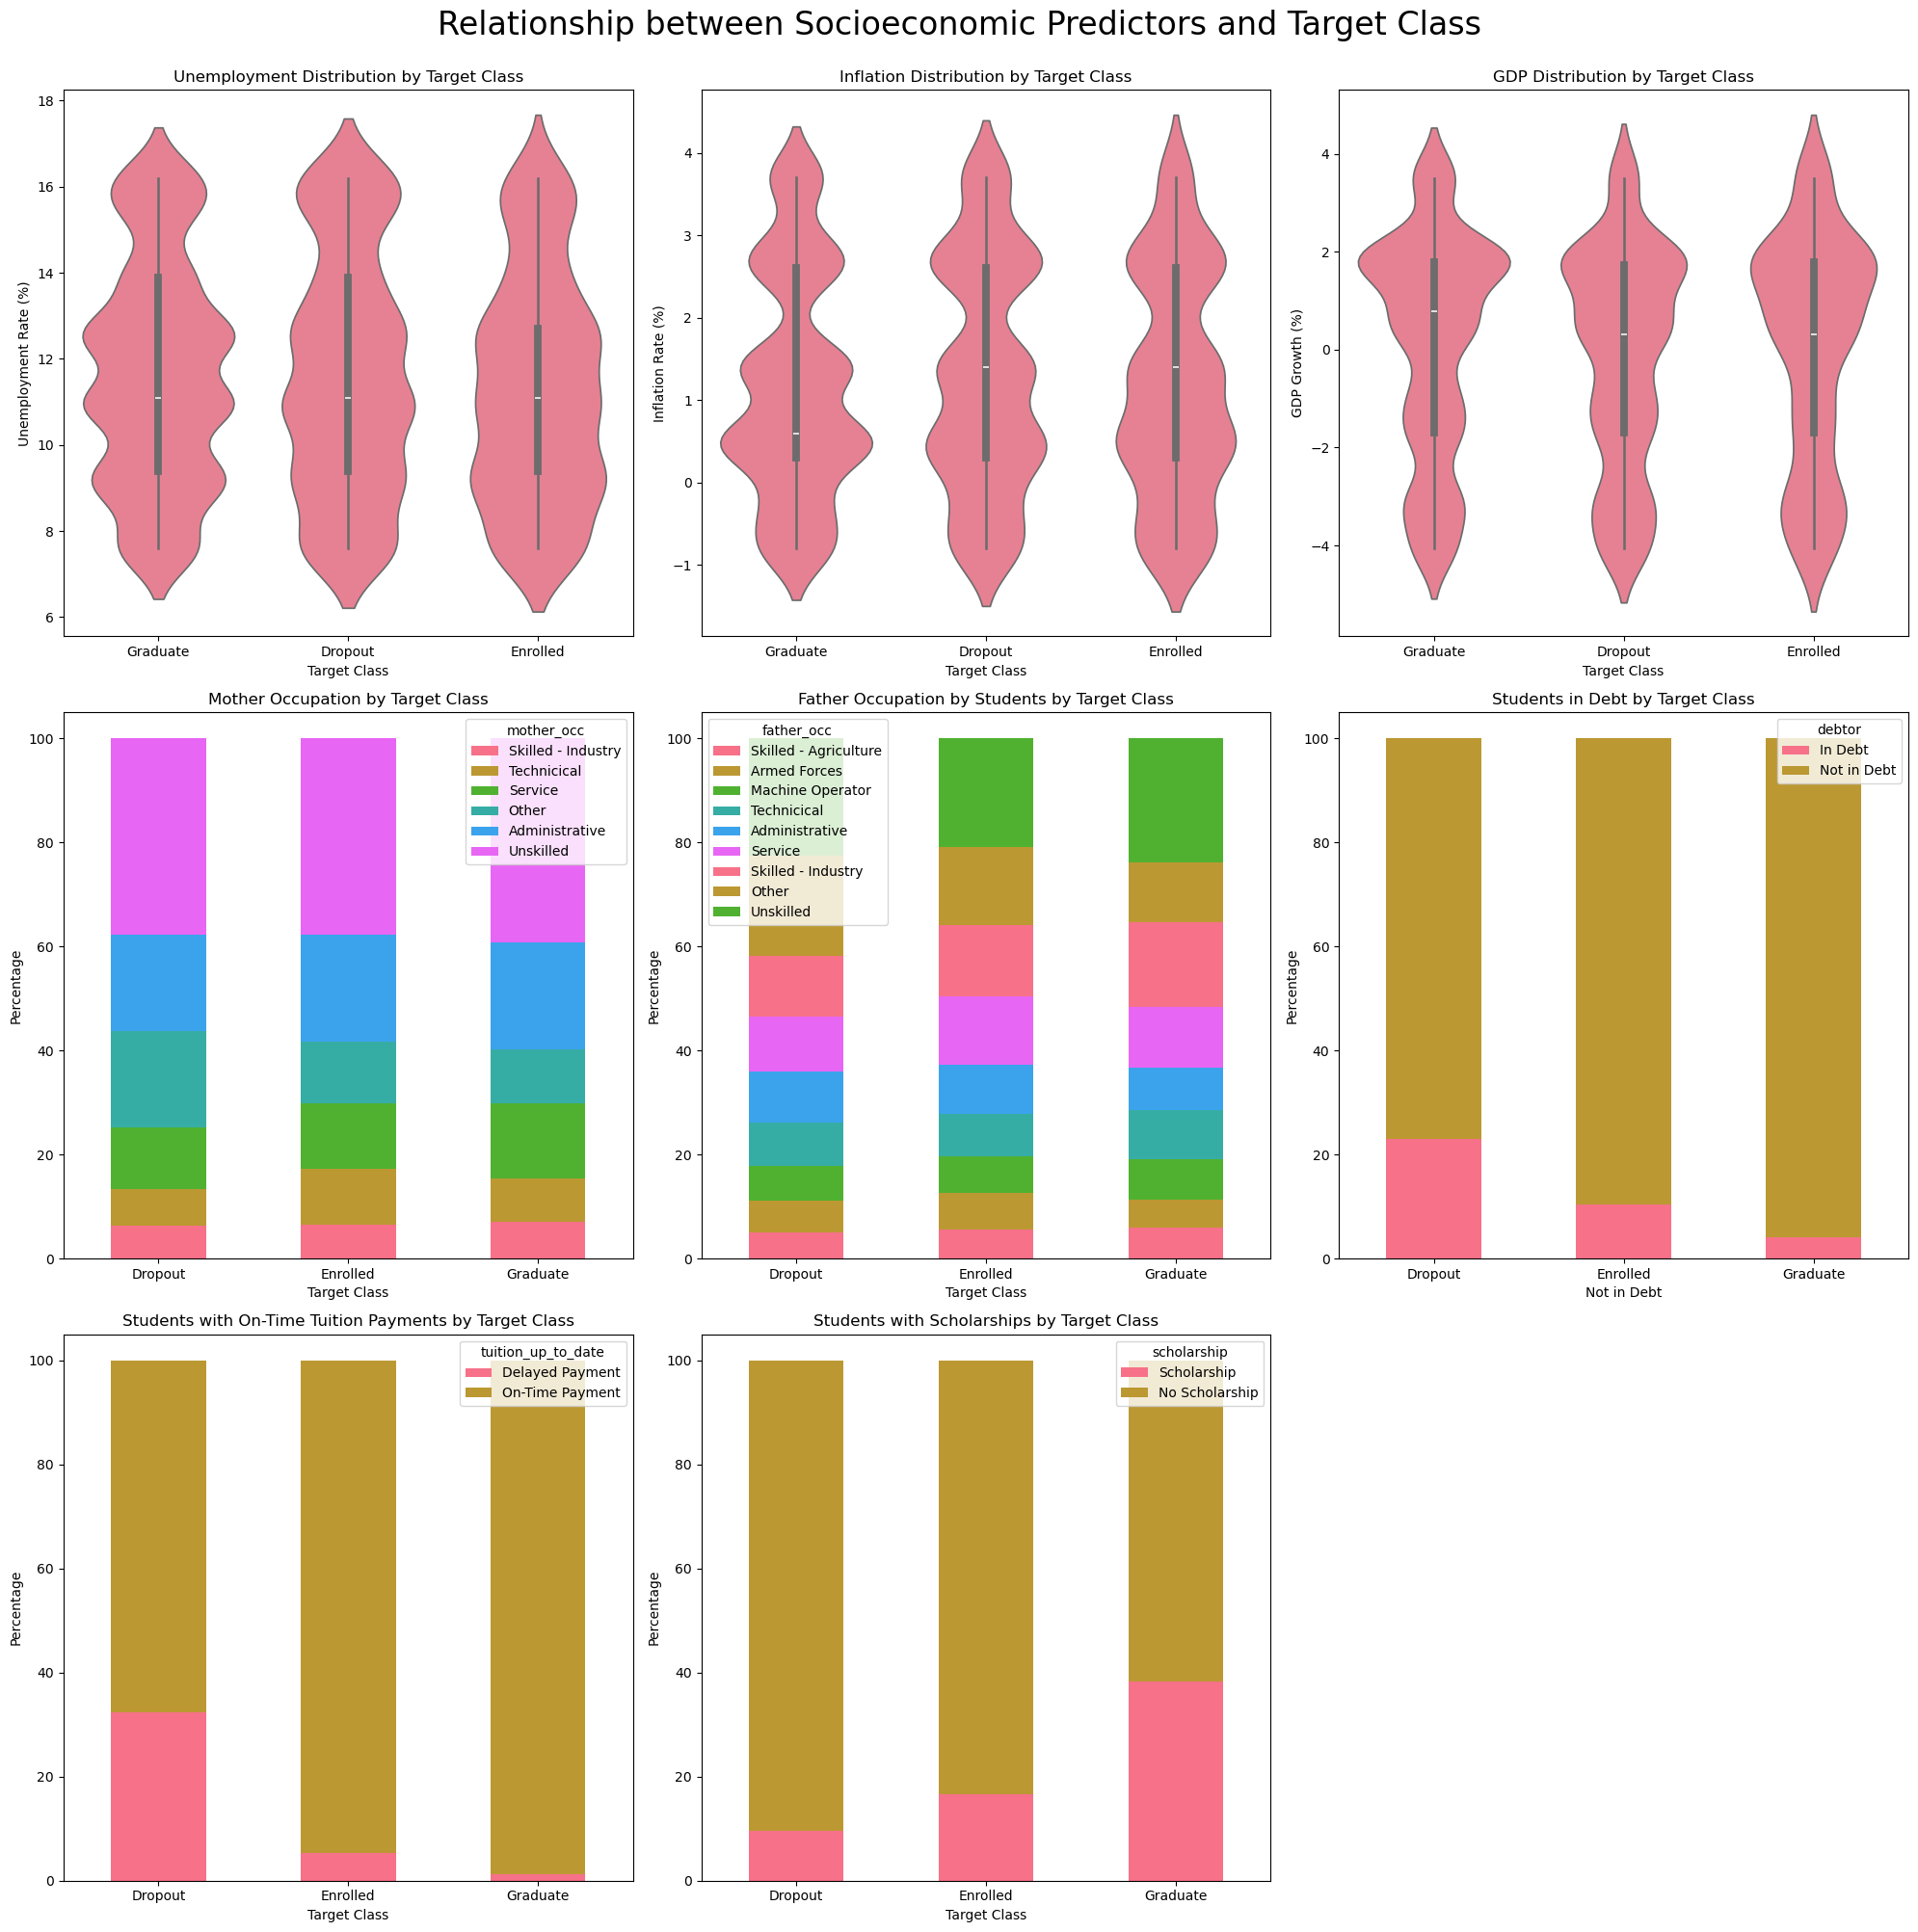

In [16]:
# subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Relationship between Socioeconomic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "unemployment", axes[0], title="Unemployment Distribution by Target Class", xlabel="Target Class", ylabel="Unemployment Rate (%)", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "inflation", axes[1], title="Inflation Distribution by Target Class", xlabel="Target Class", ylabel="Inflation Rate (%)", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "gdp", axes[2], title="GDP Distribution by Target Class", xlabel="Target Class", ylabel="GDP Growth (%)", rotate_labels=0, violin_kwargs=None)
plot_categorical(df_train, "target" , "mother_occ", axes[3], title="Mother Occupation by Target Class", value_map={3: "Technicical", 4: "Administrative", 5: "Service", 6: "Skilled - Agriculture", 7: "Skilled - Industry", 8: "Machine Operator", 9: "Unskilled", 10: "Armed Forces", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "father_occ", axes[4], title="Father Occupation by Students by Target Class", value_map={3: "Technicical", 4: "Administrative", 5: "Service", 6: "Skilled - Agriculture", 7: "Skilled - Industry", 8: "Machine Operator", 9: "Unskilled", 10: "Armed Forces", -1: "Other"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "debtor", axes[5], title="Students in Debt by Target Class", value_map={0: "Not in Debt", 1: "In Debt"}, xlabel="Not in Debt", ylabel="In Debt", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "tuition_up_to_date", axes[6], title="Students with On-Time Tuition Payments by Target Class", value_map={0: "Delayed Payment", 1: "On-Time Payment"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
plot_categorical(df_train, "target" , "scholarship", axes[7], title="Students with Scholarships by Target Class", value_map={0: "No Scholarship", 1: "Scholarship"}, xlabel="Target Class", ylabel="Percentage", rotate_labels=0, bar_kwargs=None)
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
print("\nSUMMARY: ACADEMIC PREDICTORS")
print("-" * 50)

print("\nNumeric Variables:")
print(summarize_numeric(df_train, academic_predictors))


SUMMARY: ACADEMIC PREDICTORS
--------------------------------------------------

Numeric Variables:
                    mean    std   min     max
prev_qual_grade   132.82  13.25  95.0  190.00
admission_grade   126.93  14.63  95.0  190.00
sem1_grade         10.63   4.87   0.0   18.88
sem1_approved       4.70   3.09   0.0   26.00
sem1_enrolled       6.27   2.49   0.0   26.00
sem1_evaluations    8.29   4.19   0.0   45.00
sem2_grade         10.20   5.25   0.0   18.57
sem2_approved       4.43   3.02   0.0   20.00
sem2_enrolled       6.22   2.20   0.0   23.00
sem2_evaluations    8.04   3.95   0.0   33.00


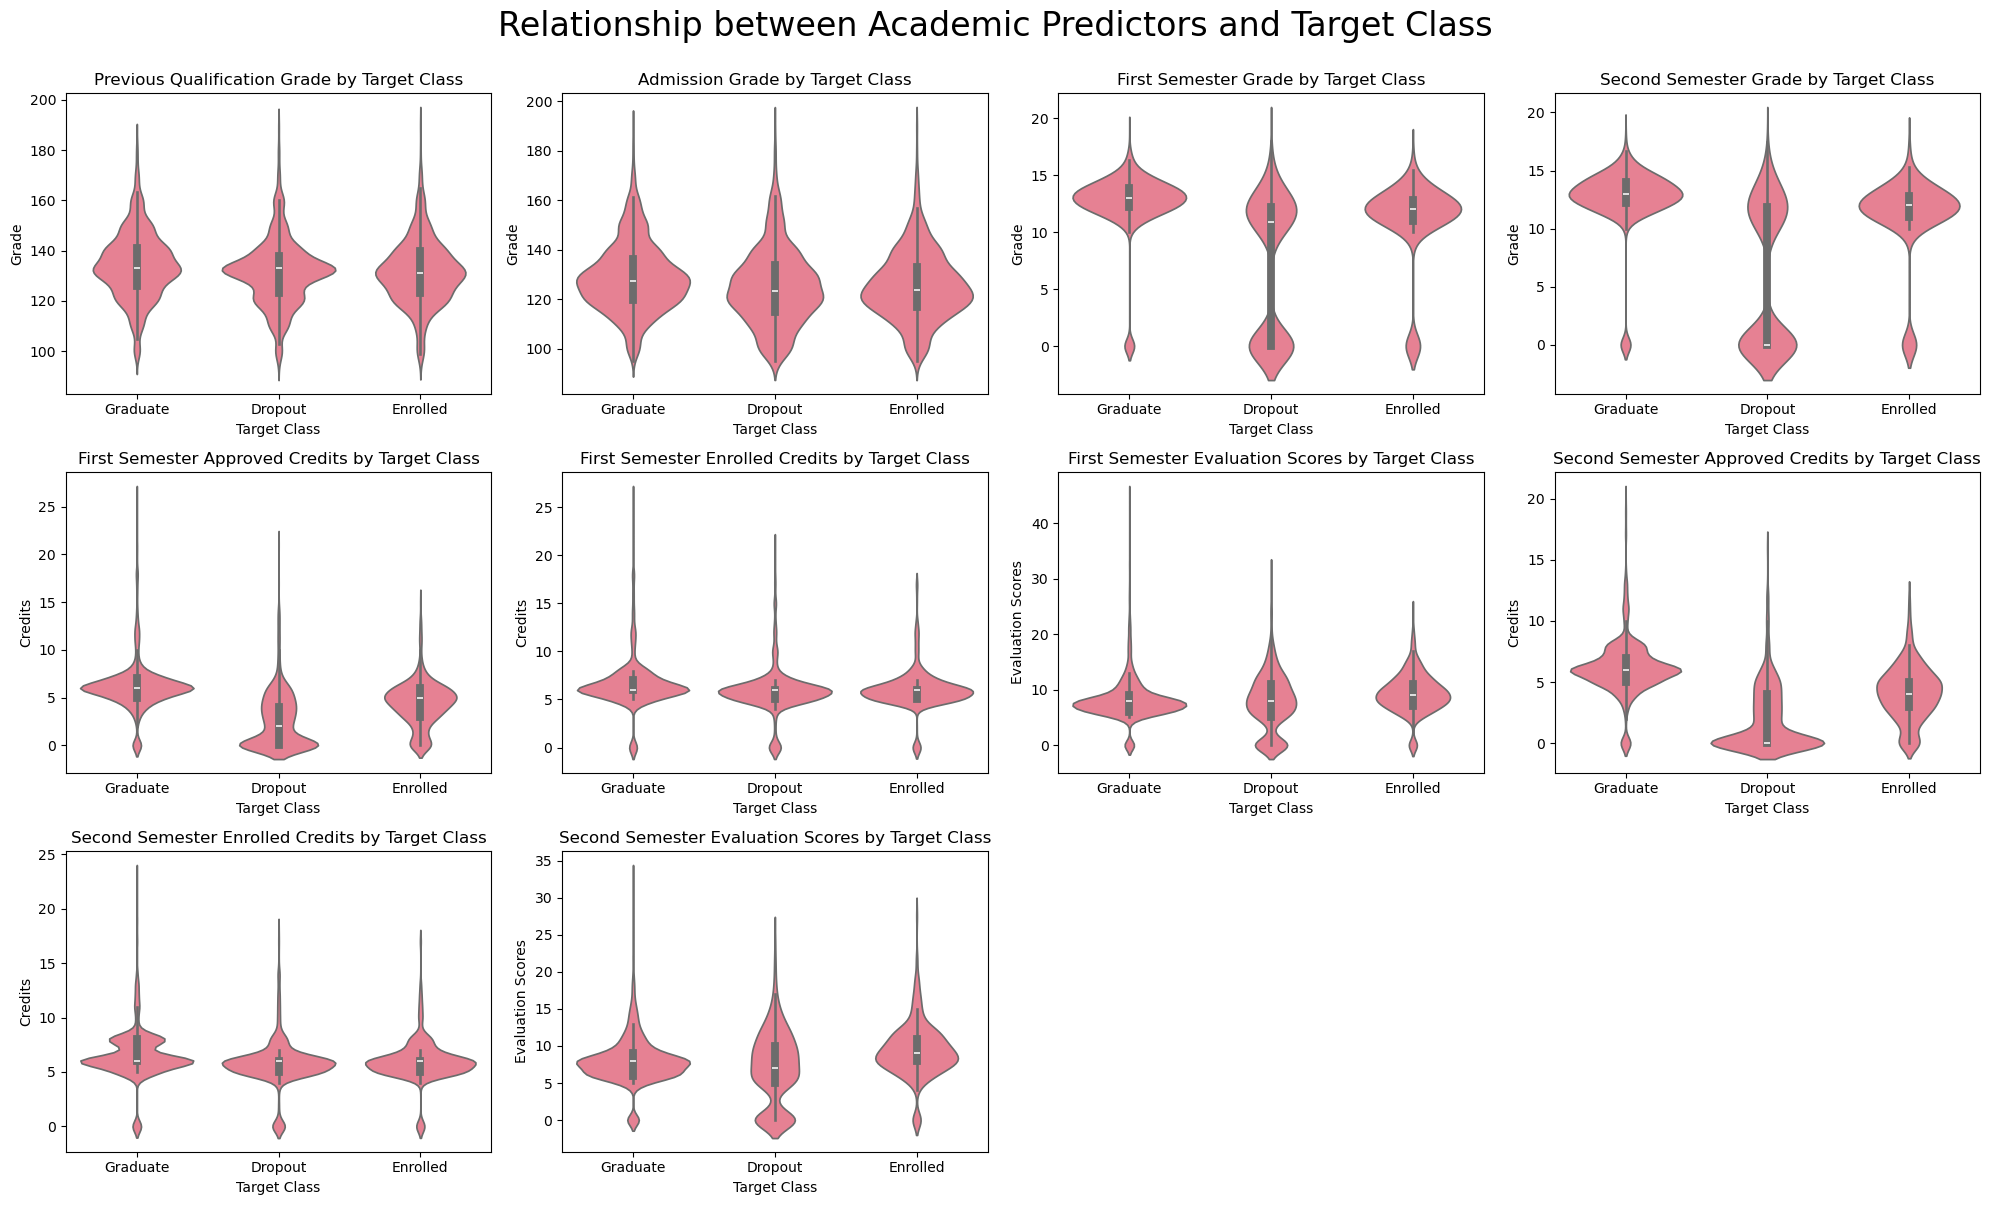

In [18]:
# subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Relationship between Academic Predictors and Target Class', fontsize=24, y=1.00)

axes = axes.flatten()

plot_numeric(df_train, "target" , "prev_qual_grade", axes[0], title="Previous Qualification Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "admission_grade", axes[1], title="Admission Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_grade", axes[2], title="First Semester Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_grade", axes[3], title="Second Semester Grade by Target Class", xlabel="Target Class", ylabel="Grade", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_approved", axes[4], title="First Semester Approved Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_enrolled", axes[5], title="First Semester Enrolled Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem1_evaluations", axes[6], title="First Semester Evaluation Scores by Target Class", xlabel="Target Class", ylabel="Evaluation Scores", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_approved", axes[7], title="Second Semester Approved Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_enrolled", axes[8], title="Second Semester Enrolled Credits by Target Class", xlabel="Target Class", ylabel="Credits", rotate_labels=0, violin_kwargs=None)
plot_numeric(df_train, "target" , "sem2_evaluations", axes[9], title="Second Semester Evaluation Scores by Target Class", xlabel="Target Class", ylabel="Evaluation Scores", rotate_labels=0, violin_kwargs=None)
axes[-1].set_visible(False)
axes[-2].set_visible(False)

plt.tight_layout()
plt.show()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

There are a few interesting observations from this exploratory data analysis.

The first is that academic predictors actually, at first glance, appear to be much poorer than I had anticipated. Notice that the grade distributions for all three class _prior to enrollment_ are nearly identical. That includes the "previous qualification" grade and the "admission" grade. This is startling, because it means that whatever afflictions plague students that require them to drop out in the Polytechnic Institute did not necessarily hurt them academically in their prior schooling. (The grading distributions _after_ enrollment do exhibit differences between classes; but this is likely due to the fact that people dropped out before receiving their grades, so they get a zero.)

Second, we can pretty clearly identify the best predictors, which are the ones that have the biggest differences in distribution between the various target classes. From the demographic predictor set, that would be gender, marital status, and whether or not the student was displaced. From the socioeconomic predictor set, that would be whether you are in debt, whether your tuition is paid on time, and whether you are on a scholarship. And finally, from the academic predictor set, that would be the First and Second Semester Approved Credits.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

Let's train our logistic regression, which will proceed in six steps.

1. Feature Preprocessing:
   
   a) Categorical Variables:
      - one-hot encoded categorical variables into binary predictors
      - dropped first category to avoid multicollinearity
      - Justification: Required for logistic regression to handle categorical data. Otherwise, there is no way for the model to know what "International" or "In-Debt" means!
   
   b) Numeric Variables:
      - applied StandardScaler to standardize all numeric features
      - justification: Ensures all features are on same scale for PCA and regularization. This is important because if you look at metrics like grades, the admissions grades are out of 200 whereas the grades post enrollment are only out of 20. Both PCA and Regularization are sensitive to the scale of input features. Variables with larger scales will dominate the first few principal components, and features with larger scales will have smaller coefficients to achieve the same effect, thus making feature selection with LASSO unreliable.
      
2. Dimensionality Reduction:
   - applied PCA to numeric features
   - grid searched over number of components (1-15)
   - justification: 
      * PCA reduces multicollinearity between numeric predictors
      * it captures the patterns in the numeric variables
      * I chose the # of components using cross-validation
      
3. Feature Engineering:
   - created polynomial features from PCA components
   - grid searched over degrees 1-3
   - justification:
      * allows model to capture non-linear relationships
      * PCA first reduces dimensionality to prevent polynomial explosion
      * Degree selected through cross-validation

4. Class Balancing with SMOTE:
   - applied SMOTE after preprocessing but before model fitting
   - creates synthetic samples of minority classes by selecting a minority sample, picking a nearest neighbor, and creating a new synthetic sample using some combination of these minority sample observations.
   - This is better than undersampling in this case, because undersampling throws out valuable information.
   - Justification:
      * Data is imbalanced (Graduate: 50%, Dropout: 32%, Enrolled: 18%)
      * SMOTE creates synthetic examples of minority classes by interpolating between existing samples
      * Better than simple oversampling because it creates new, plausible examples rather than just duplicating existing ones
      * Applied after preprocessing to ensure synthetic samples maintain preprocessed data structure

4. Model Selection:
   - Chose Logistic Regression with LASSO (L1) regularization
   - Used OneVsRest strategy for multiclass
   - Justification:
      * L1 regularization performs feature selection
      * Interpretable coefficients
      * OneVsRest breaks complex 3-class problem into binary problems
      
5. Hyperparameter Tuning:
   - used 5-fold cross-validation with grid search
   - tuned:
      * number of PCs (1-15)
      * polynomial degree (1-3)
      * regularization strength (20 values log-spaced from 10^-2 to 10^2)
   - justification: 
      * cross-validation prevents overfitting, because it holds out validation data to prevent leakage
      * grid search finds optimal complexity
      * Log-spaced regularization values explore different strengths of L1 penalty

6. Evaluation:
   - cross validation accuracy (# correct preditions divided by # total predictions)
   - ROC curves and AUC scores (measures TPR and FPR and their ratio)
   - Precision, recall, and f1-score
   - examined feature importance through LASSO coefficients. Indicated the top few features.

We can use the sklearn pipeline --- which calls `fit` on each step sequentially --- to accomplish this. Then we will use grid search to tune the hyperparameters and find optimal # of PCs, polynomial degree, and regularization strength.

In [19]:
# set up preprocessing for numeric predictors
numeric_transformer = Pipeline(steps=[
   ('scaler', StandardScaler()),
   ('pca', PCA()),
   ('poly', PolynomialFeatures(include_bias=False))
])

# set up preprocessing for categorical predictors
categorical_transformer = Pipeline(steps=[
   ('onehot', OneHotEncoder(drop = 'first', sparse_output = False))
])

pipeline = ImbPipeline([ 
    ('preprocessor', ColumnTransformer(transformers=[
       ('num', numeric_transformer, numeric_predictors),
       ('cat', categorical_transformer, categorical_predictors)
    ])),
    ('sampler', SMOTE(random_state=seed)),
    ('classifier', OneVsRestClassifier(LogisticRegression(
        penalty='l1', 
        solver='liblinear', 
        max_iter=1000, 
        random_state=seed
    )))
])

params = {
    'preprocessor__num__pca__n_components': list(range(1, 15)),   # integers 1 thru 14 (number of numeric predictors)
    'preprocessor__num__poly__degree': list(range(1, 3)),
    'classifier__estimator__C': np.logspace(-2, 2, 10)    # note to self: penalty is 1/lambda
}

# grid search w/ cross val
grid_search = GridSearchCV(
    pipeline,
    params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


Best parameters: {'classifier__estimator__C': np.float64(1.6681005372000592), 'preprocessor__num__pca__n_components': 13, 'preprocessor__num__poly__degree': 1}
Best cross-validation score: 0.7508


Now, let's graph coefficient importance for each of the three models I just trained.

Number of models: 3

Top Features for Dropout Class
--------------------
                           Feature  Coefficient
34                 On-Time Tuition    -2.568630
10                           PC 11     1.604412
20  Mother Intermediate Technician    -0.762093
1                             PC 2    -0.737403
14                          Single     0.653071
2                             PC 3    -0.637809
15                         Married     0.601196
17           International Student    -0.600714
26     Father Administrative Staff     0.553567
12                           PC 13    -0.542926


Top Features for Enrolled Class
--------------------
                           Feature  Coefficient
34                 On-Time Tuition     1.697523
5                             PC 6     0.799561
10                           PC 11    -0.685416
35            Receives Scholarship    -0.667073
20  Mother Intermediate Technician     0.547687
25  Father Intermediate Technician    -0.504572
14      

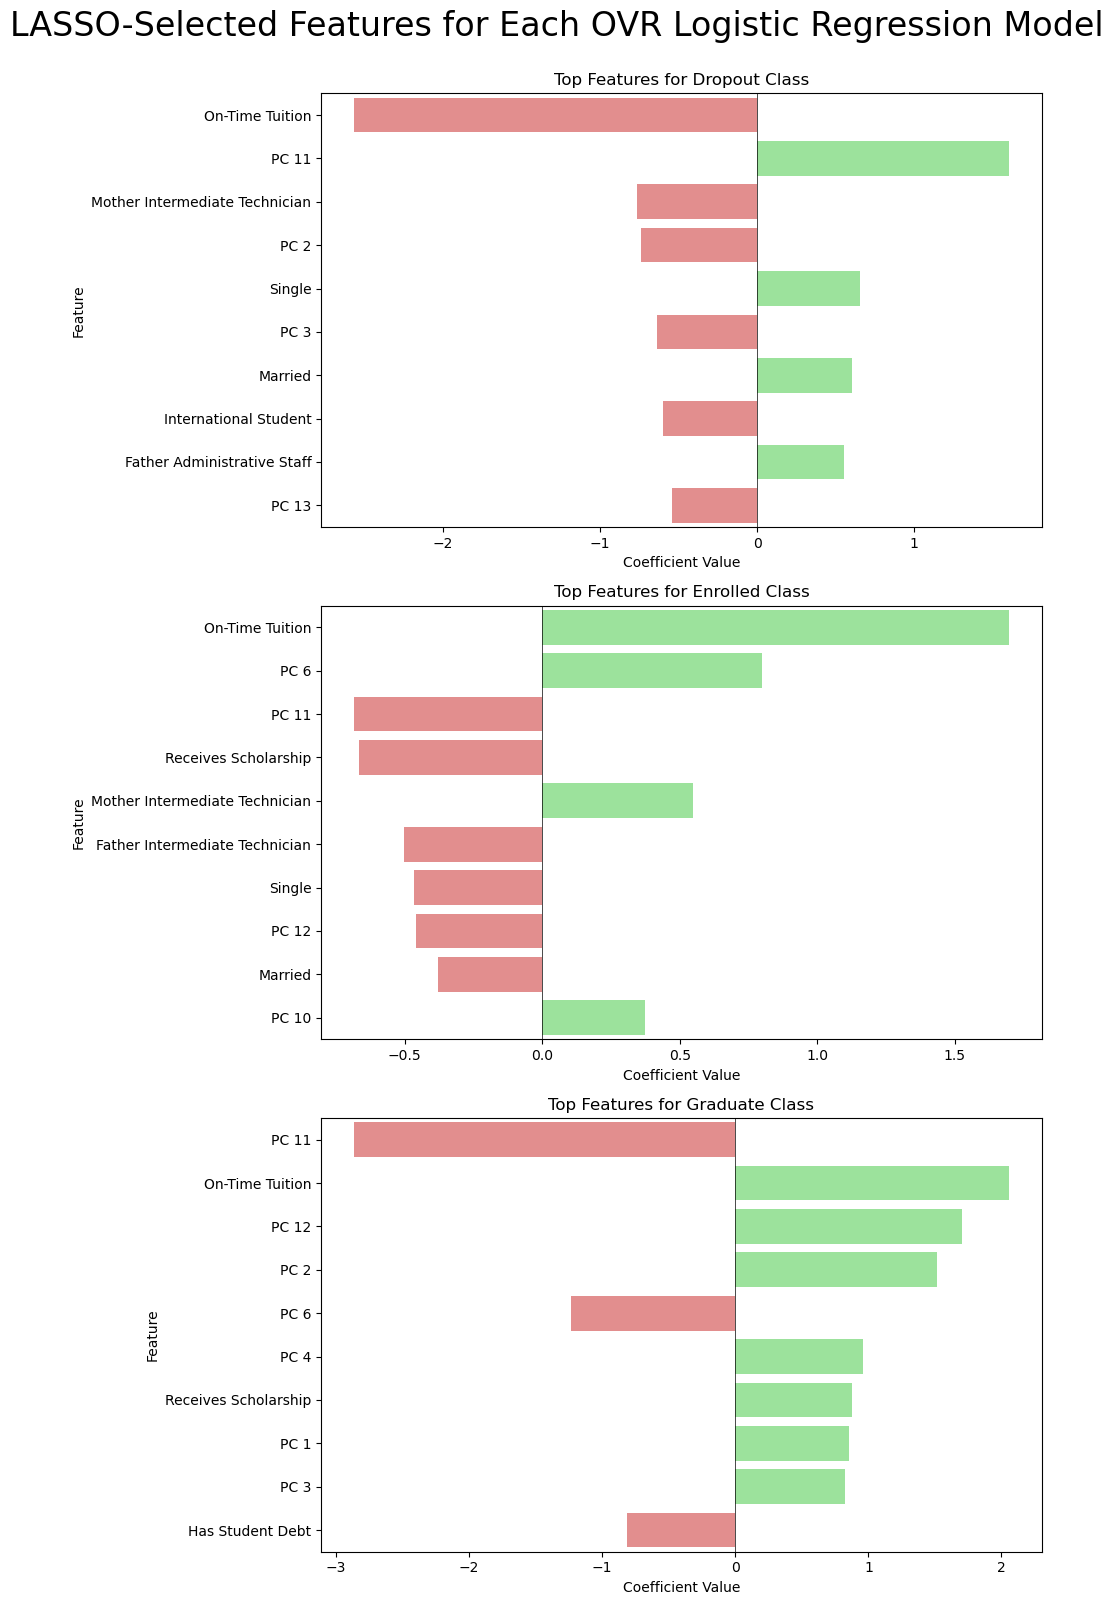

In [20]:
# extract the best model:
best_model_ovr = grid_search.best_estimator_

# get coefficients for each of the three ovr models I trained
estimators = best_model_ovr.named_steps["classifier"].estimators_
print(f"Number of models: {len(estimators)}\n")

# get feature names
numeric_predictor_names = (best_model_ovr.named_steps['preprocessor']
                .named_transformers_['num']
                .named_steps['poly']
                .get_feature_names_out())

categorical_predictor_names = (best_model_ovr.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out())

predictor_names = np.concatenate([numeric_predictor_names, categorical_predictor_names])


feature_mapping = {
    'tuition_up_to_date_1': 'On-Time Tuition',
    'x0': 'PC 1',
    'x1': 'PC 2',
    'x2': 'PC 3',
    'x3': 'PC 4',
    'x4': 'PC 5',
    'x5': 'PC 6',
    'x6': 'PC 7',
    'x7': 'PC 8',
    'x8': 'PC 9',
    'x9': 'PC 10',
    'x10': 'PC 11',
    'x11': 'PC 12',
    'x12': 'PC 13',
    'x10^2': 'PC 10 Squared',
    'x0 x10': 'PC 1 * PC 11',
    'x1 x10': 'PC 2 * PC 11',
    'x2 x10': 'PC 3 * PC 11',
    'x3 x10': 'PC 4 * PC 11',
    'x9 x10': 'PC 10 * PC 11',
    'mother_occ_3': "Mother Intermediate Technician",
    'father_occ_3': "Father Intermediate Technician",
    'father_occ_4': "Father Administrative Staff",
    'father_occ_6': 'Father Skilled - Agriculture',
    'international_1': 'International Student',
    'debtor_1': 'Has Student Debt',
    'scholarship_1': 'Receives Scholarship',
    'marital_status_1': 'Single',
    'marital_status_2': 'Married'
}

# create a new figure for each model
fig, axes = plt.subplots(3, 1, figsize=(10, 16), sharey = False)
fig.suptitle('LASSO-Selected Features for Each OVR Logistic Regression Model', fontsize=24, y=1.00)


for i, (est, ax, class_name) in enumerate(zip(estimators, axes, best_model_ovr.classes_)):
    # Create coefficient DataFrame for this estimator
    coef_df = pd.DataFrame({
        'Feature': predictor_names,
        'Coefficient': est.coef_[0],
        'Abs_Coefficient': np.abs(est.coef_[0])
    })
    
    # map features
    coef_df['Feature'] = coef_df['Feature'].map(feature_mapping).fillna(coef_df['Feature'])

    # sort and get top features
    top_features = coef_df.nlargest(10, 'Abs_Coefficient')[['Feature', 'Coefficient']]
    
    print(f"Top Features for {class_name} Class")
    print("-"*20)
    print(f"{top_features}\n\n")
    
    # plot
    top_features['Sign'] = ['Negative' if x < 0 else 'Positive' for x in top_features['Coefficient']]
    hue_colors = {'Negative': 'lightcoral', 'Positive': 'lightgreen'}
    sns.barplot(data = top_features, y = 'Feature', x = 'Coefficient', ax = ax, hue = 'Sign', palette = hue_colors)
    ax.axvline(x = 0, color = 'black', linestyle = '-', linewidth = 0.5)
    ax.set_title(f'Top Features for {class_name} Class')
    ax.set_xlabel('Coefficient Value')
    ax.legend_.remove()


plt.tight_layout()
plt.show()

Notice that there is a significant overalap in the features that are significant for each of the three models. The "On-Time Tuition" indicator variable is a huge predictor of whether a student will drop out, will graduate, and will enroll. It has:
- a negative coefficient for dropout, suggesting that on-time payments reduce dropout probability
- a strong positive coefficient for enrolled and graduate, which suggests that on-time tuition payments are key predictors of student success. 

It makes sense that this notion of financial stability is an important factor in dropout decisions. This is further supported by the fact that scholarship status appears in all models.

In addition to the "On-Time Tuition" indicator, both Principal Component #11 and Principal Component #6 --- from the dimensionality reduction of the 15 numerical variables --- also seem to be strong predictors of both the dropout class and the graduate/enrolled classes. Because we have used principal component analysis, though, we have flattened the dimensions of the numeric variables, making them uninterpretable. Thus, in order to see what PC #11 and PC #6 truly mean, we must examine the _loading matrix_.

In [47]:
# get loadings for pc 11 and pc 6

pca_step = best_model_ovr.named_steps['preprocessor'].named_transformers_['num'].named_steps['pca']

pc_11_loadings = pca_step.components_[10]
pc_6_loadings = pca_step.components_[5]

loadings_df = pd.DataFrame({
    'Feature': numeric_predictors,
    'PC 11 Loading': pc_11_loadings,
    'PC 6 Loading': pc_6_loadings
})

loadings_df 


,Feature,PC 11 Loading,PC 6 Loading
0,age,-0.028457,-0.407479
1,unemployment,-0.006833,-0.190507
2,inflation,-0.030863,0.013492
3,gdp,-0.056755,-0.100352
4,prev_qual_grade,-0.048541,0.153110
5,admission_grade,0.055626,-0.001058
6,sem1_grade,0.618771,0.069715
7,sem1_approved,-0.195367,-0.254363
8,sem1_enrolled,0.202735,-0.152250
9,sem1_evaluations,-0.325180,0.493256


Above, we have the loadings for both PC #11 and PC #6. The loadings matrix contains the eigenvectors that transform our original set of numeric predictors into the principal components. Each column is an eigenvector. When I multiply my original 14-dimensional standardized data by these vectors, I get the corresponding principal component scores. For example, to get a single observation's value for PC #11, I would compute:

PC #11 = -0.02 * age + -0.007 * unemployment + ... - 0.01 * sem2_evaluations 

Thus, by looking at the loadings, we can see which feature sare the most important in building a given principal component.
- PC #11 is primarily built by the first semester grades, enrolled/approved credits, and evaluations. This makes sense --- we would expect someone with a low number of credits and poor first-semester grades to be more likely to drop out.
- PC #6 is primarily built from age and second-semester evaluations. PC #6 shows up in the classifiers for "enrolled" and "graduate" --- this makes sense,because these sorts of predictors are useful to distinguish between a graduate and an enrolled student. For example, graduate may, on average, be slightly older, whereas enrolled students may, on average, be slightly younger. 

Now, the loading examination isn't perfect --- we still lose some interpretability. But nonetheless, dimensionality reduction signficantly improves model performance, so the tradeoff is worthwhile.

Now, let's graph the ROC curve, which represents the true positive rate and false positive rate at different thresholds. Recall that because we used OVR, we have three models --- one to predict "Dropout", one to predict "Enrolled" and one to predict "Graduate" --- and so we have three different ROC curves.

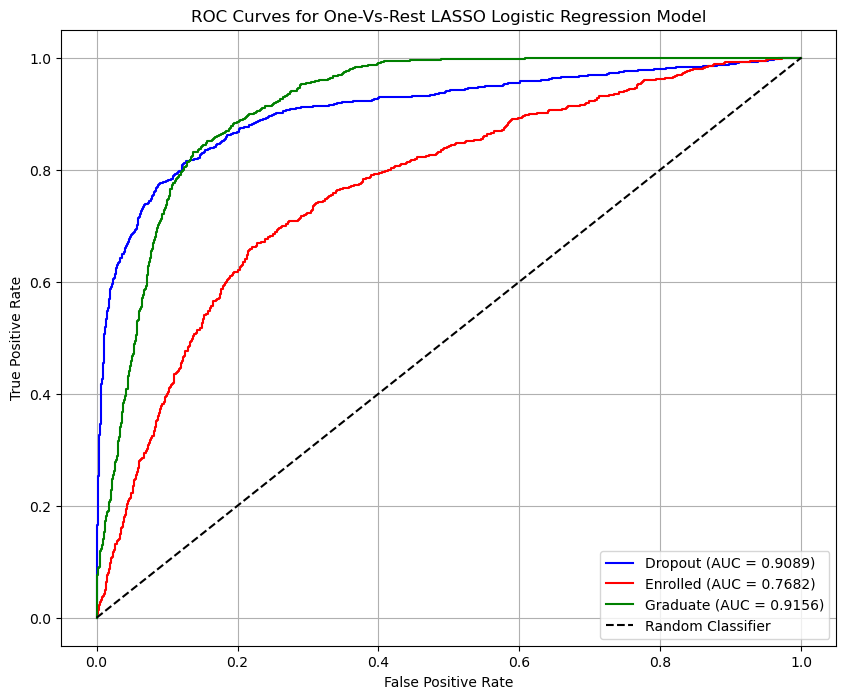

In [22]:
plt.figure(figsize=(10, 8))

y_train_ravel = y_train.values.ravel()

# get cross validated probabilites (n x 3)
cv_probs = cross_val_predict(best_model_ovr, X_train, y_train_ravel, method='predict_proba', cv=10)

for i, (label, color) in enumerate(zip(best_model_ovr.classes_, ['blue', 'red', 'green'])):
    
    # get binary outcomes for each class
    y_binary = (y_train_ravel == label).astype(int)
        
    # get one-vs-rest probabilities 
    class_probs = cv_probs[:, i]
    
    # calculate ROC
    fpr, tpr, _ = roc_curve(y_binary, class_probs)
    roc_auc = auc(fpr, tpr)
    
    # plot ROC curve
    plt.plot(fpr, tpr, color=color, 
            label=f'{label} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for One-Vs-Rest LASSO Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

     Dropout       0.84      0.72      0.77      1066
    Enrolled       0.44      0.58      0.50       595
    Graduate       0.85      0.83      0.84      1657

    accuracy                           0.75      3318
   macro avg       0.71      0.71      0.70      3318
weighted avg       0.77      0.75      0.76      3318



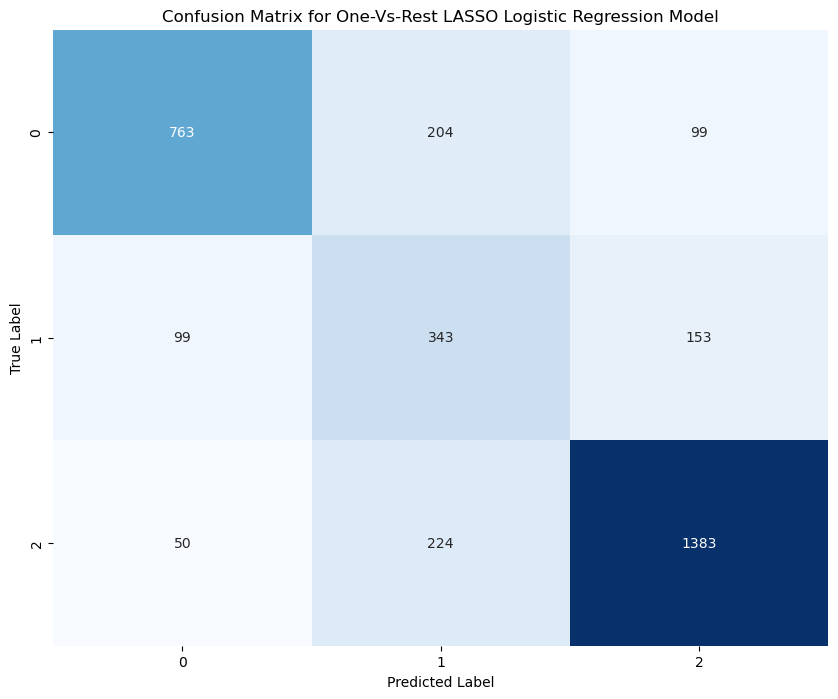

In [23]:
# print classification report
y_pred = cross_val_predict(best_model_ovr, X_train, y_train_ravel, cv=10)

print(classification_report(y_train_ravel, y_pred))

# create confusion matrix

conf_matrix = confusion_matrix(y_train_ravel, y_pred)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for One-Vs-Rest LASSO Logistic Regression Model')

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.show()

We notice a few key observations from examining our model performance. First, the the "Dropout" classifier (AUC = 0.913, f1-score = 0.77) and the "Graduate" classifier (AUC = 0.918, f1-score = 0.84) both do quite well. They are not far off of a perfect classifier, which would have AUC = 1 or an f1-score = 1. And, clearly, all three models perform significantly better than random.

Note, though, that the "Enrolled" classifier (AUC = 0.79, f1-score = 0.58) does much worse. This is likely due to the class imbalance issue that I highlighted at the beginning of the workbook. Because there are fewer "enrolled" observations, the model has less data to learn the patterns specific to "enrolled" students and might be biased towards the majority classes. Even though I used SMOTE to try to correct for this, SMOTE creates synthetic examples by interpolating between existing minority cases. So, these synthetic samples could be either unrealistic or noisy in such a way that doesn't actually help the model learn meaningful patterns.

Second, our three classifiers typically have better precision than recall. "Precision" is TP / (TP + FP), which evaluates how many false alarms we raise. "Recall" is TP / (TP + FN), which evaluates how well the model identifies all positive instances. The F1 score is a harmonic mean of these two metrics. This suggests that the model is very conservative in making positive predictions, because it only predicts true positives when very confident. Thus, it might miss some actual positives (high false negatives), but rarely makes false positive predictions (low false positives).

Finally, let's generate our predictions on the test set.

In [24]:
logreg_predictions_df = pd.DataFrame({
   'ID': X_test.index,  # assuming this is the ID you want
   'LogReg_Predicted': best_model_ovr.predict(X_test)
})

logreg_predictions_df.to_csv('./submissions/submission_logreg.csv', index=False)


In [25]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

Let's now train our decision tree classifier which will proceed in the following steps:

1. Feature Preprocessing:

    - Categorical Variables
        - One-hot encoded categorical variables into binary predictors.
        - No need for dropping first category (tree can handle the redundancy)
        - Fill missing values with the most frequent value. 
        - Justification:
            - One hot encoding allows the decision tree to handle categorical data (and eases in our interpretability) but there is no need to drop_first since the tree can handle redundancy. 
            - Filling our missings with the most frequent value allows us to still use all of our predictors (even if some values are missing) while only introducing some small bias at the observational level. 

    - Numeric Variables 
        - No need for any preprocessing here. 
            - First, we do not need feature scaling. Decision trees use _thresholds_ rather than _levels_, which means that different scales do not affect our overall fit.
            - Second, we do not need PCA. Decision trees are robust to multicollinearity and automatically remove irrelevant features when they split to maximize information gain and impurity reduction. Thus, PCA, in this case, only serves to reduce interpretability.
            - Third, we do not need polynomial transformation. The decision tree can inherently capture non-linear relationships in the data, because it's splits create piecewise decision boundaries on its own. 

    - Response Variable
        - As before, we have class imbalance in our data, which means we will use SMOTE again in order to create synthetic minority samples.

2. Model Selection:
    - I will use the entropy score, which measures the "impurity" in a given node, as our criterion for splitting the tree. The tree will then choose the split that maximizes information gain, which is defined as the difference between the parent node entropy and the child node entropy. I use entropy rather than the Gini index because, although entropy is a tad more computationally expensive, it tends to perform slightly better than the Gini index on our model. Furthermore, because our dataset is small, computational complexity is less of a concern than accuracy.
    - We must also choose between three metrics of complexity control --- tree depth, maximum number of leaves, and the pruning penalty --- via cross validation. 
        - We can set a maximum tree depth in order to prevent trees from extending to a depth that may lead to overfitting.
        - We can similarly set the maximum number of leaves to prevent the tree from creating a leaf for every unique combination of features. 
        - We can control the pruning penalty (ccp_alpha) in order to figure out how much the tree should penalize adding additional leaves. The complexity score is the sum of the classification error plus a penalty for tree size. A higher ccp_alpha would increase that penalty and reduce the number of leaves on the final tree.
        - All these methods do functionally the same thing: they prevent the tree from overfitting to seen data by limiting complexity. We will use complexity to figure out which strategy we should use.
        - Note: there are certain situations in which it may be useful to use multiple of these complexity reduction strategies at once. But this is not one of these cases, and it would be far too computationally complex.
    - We use grid search to iterate these hyperparameters
        - max depth iterates from 2 to 50 with stepsize 2
        - max leaves iterates from 5 to 125 with stepsize 5
        - ccp_alpha candidate values are determined from DecisionTreeClassifier.cost_complexity_pruning_path()
    - Selecting these hyperparameters will help us pick a model that generalizes best to unseen data without overfitting or underfitting.
        
3. Model Evaluation:
    - To measure model performance we will examine:
        - Precision, recall, and f1-score
        - Note: we do not examine the ROC curve for the decision tree, as it makes little sense given that there are no thresholds
    - To measure feature importance, unlike for the OVR logistic regression model, we cannot just look at the size of a coefficient. Instead, we will use permutation importance, which calculates how much model performance drops when each feature is randomly shuffled.

As before, we will use the sklearn pipeline.

In [49]:
numeric_transformer = 'passthrough'

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output = False))
])

base_model = DecisionTreeClassifier(criterion='entropy', random_state=seed)

pipeline = ImbPipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_predictors),
        ('cat', categorical_transformer, categorical_predictors)
    ])),
    ('smote', SMOTE(random_state=seed)),
    ('classifier', base_model)
])

# get cost complexity pruning path and array of ccp_alphas for our params grid
path = base_model.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

params_grid = [
    {'classifier__max_depth': list(range(2, 51, 2))},

    {'classifier__max_leaf_nodes': list(range(5, 126, 2))},

    {'classifier__ccp_alpha': ccp_alphas}
]

# grid search w/ cross val
grid_search = GridSearchCV(
    pipeline,
    param_grid=params_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Depth of best estimator: {grid_search.best_estimator_.named_steps['classifier'].get_depth()}")

Fitting 5 folds for each of 473 candidates, totalling 2365 fits
Best parameters: {'classifier__max_leaf_nodes': 65}
Best cross-validation score: 0.7288
Depth of best estimator: 12


Note that our best model constrains the number of leaves on the tree. It does not constrain the maximum depth, nor does it use pruning. Indeed, it looks like the optimal maximum number of leaves is 65 nodes --- too high and there is overfitting; too low and it might not capture the patterns in the data.

At this complexity constraint, the tree has a depth of 12.

Note: because the complexity constraint is the maximum number of leaves, not the maximum depth, the tree is unbalanced, though not egregiously so. We can see it visualized below:

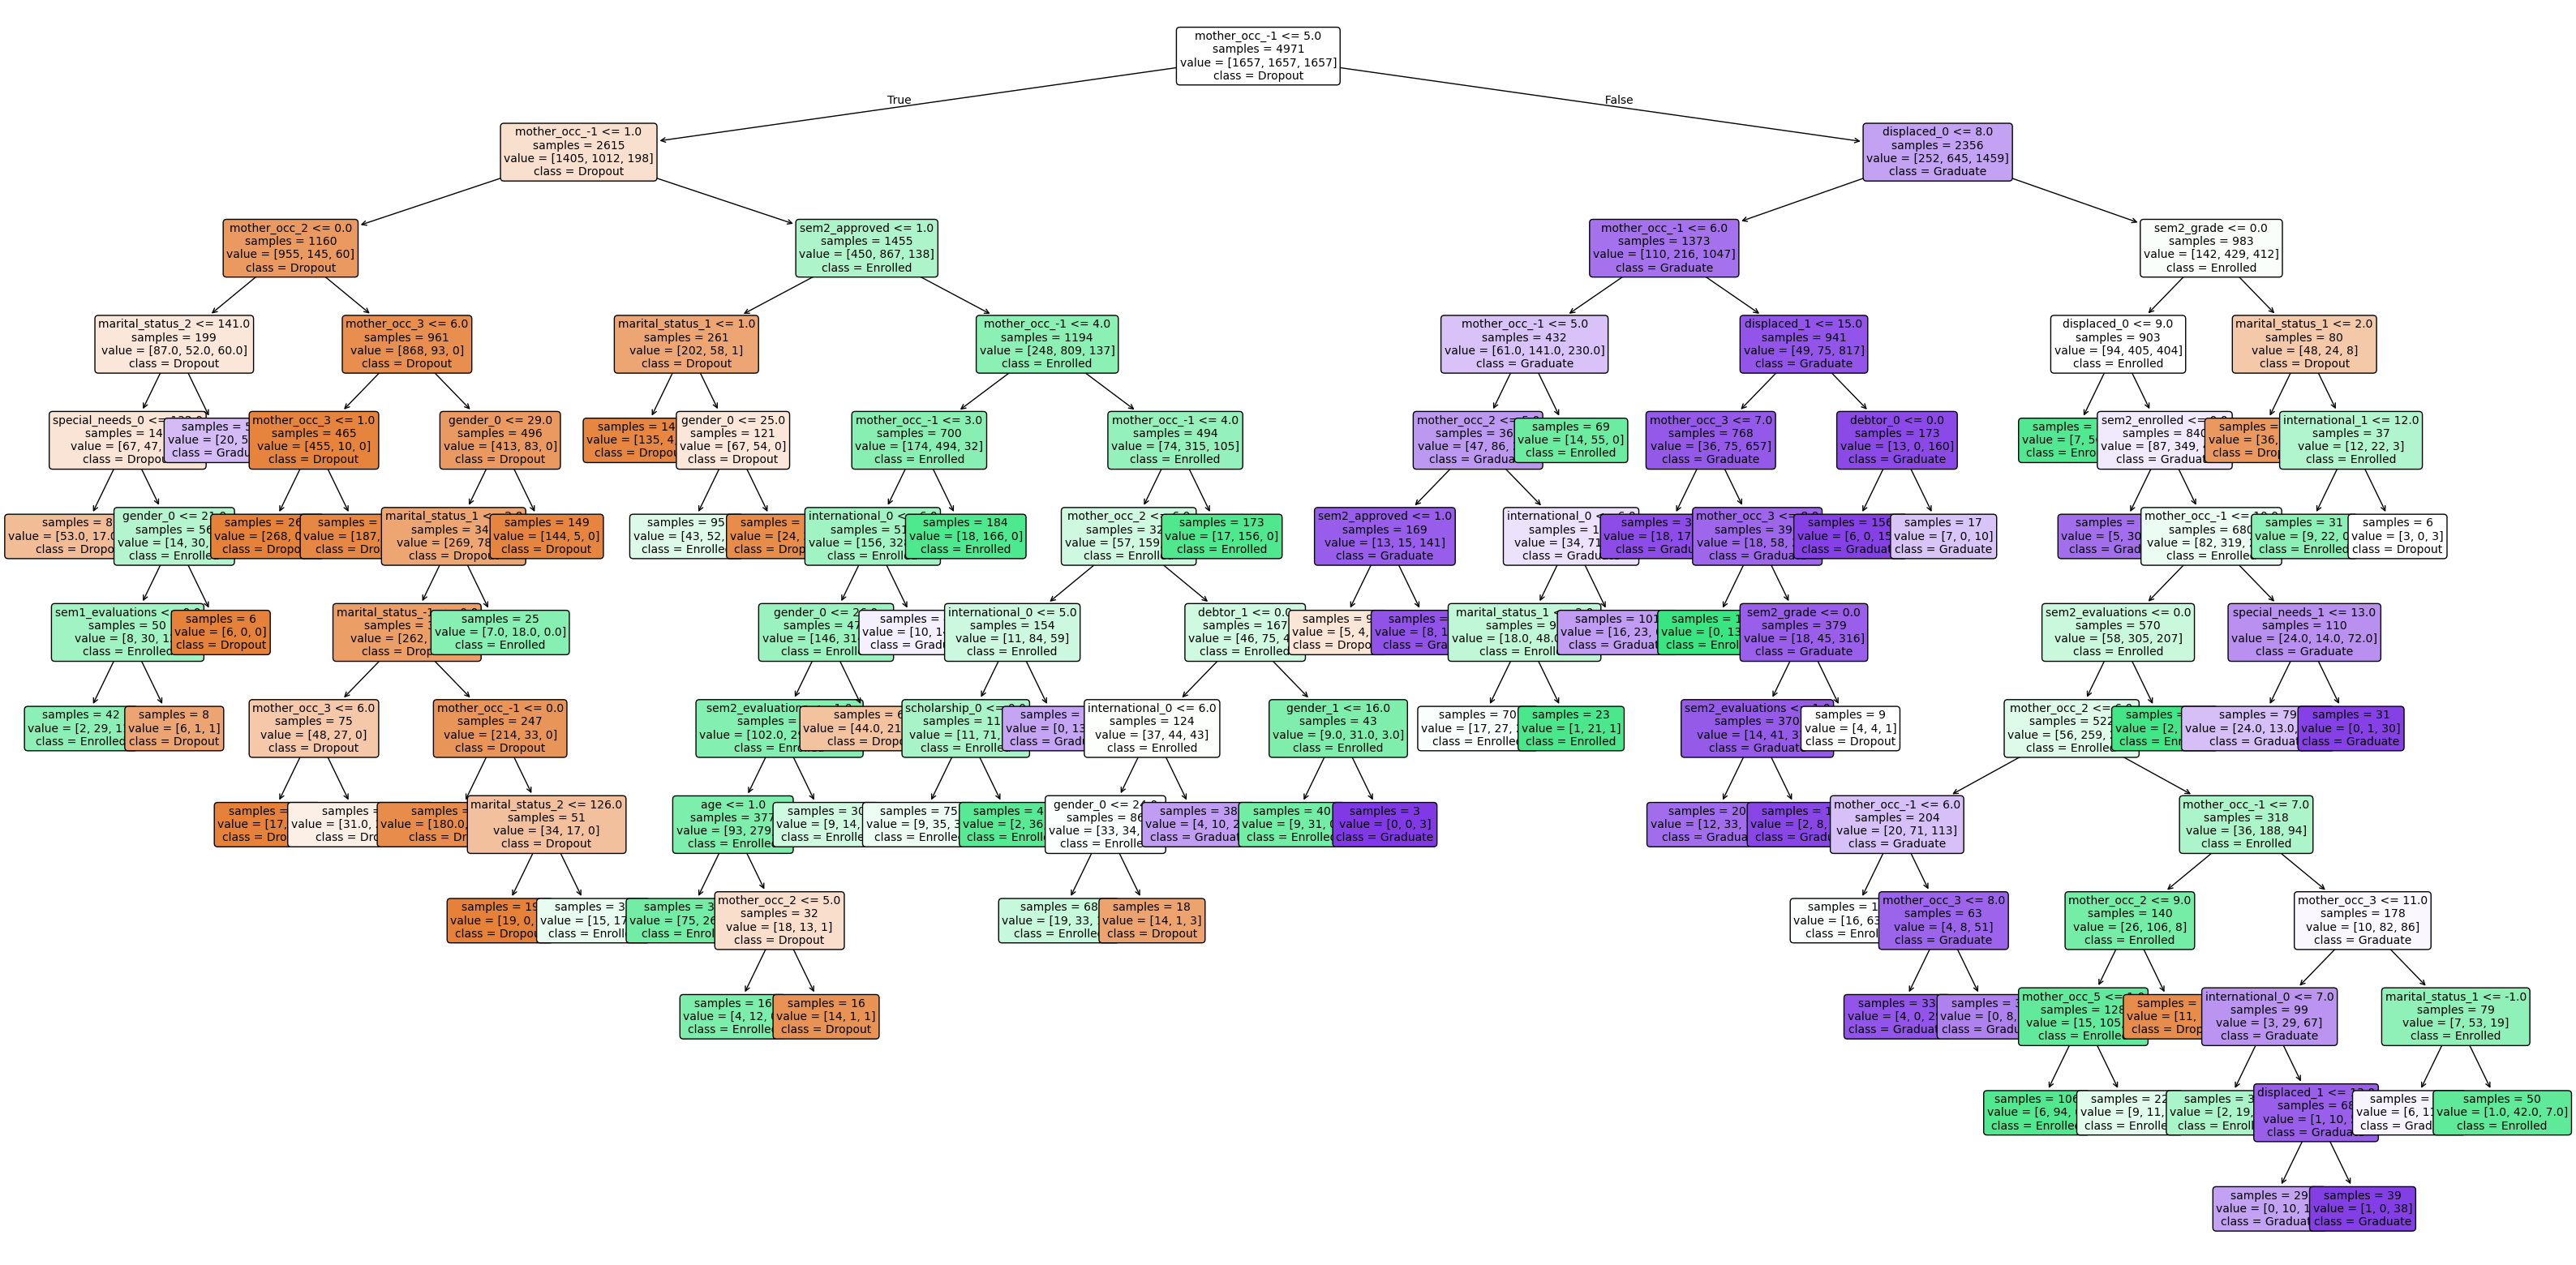

In [56]:
best_model_dt = grid_search.best_estimator_

# get our best tree from our pipeline
best_tree = best_model_dt.named_steps['classifier']

# get our preprocessor in order to get transformed feature names since we onehotencoded.
preprocessor = best_model_dt.named_steps['preprocessor']
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_predictors)
all_feature_names = list(cat_feature_names) + list(numeric_predictors)

plt.figure(figsize=(40, 20))
plot_tree(best_tree, 
          feature_names=all_feature_names,
          class_names=best_tree.classes_,
          filled=True,
          fontsize=10,
          rounded=True,
          proportion=False,
          impurity=False,
          precision=0 
)
plt.show()

Next, we will evaluate feature importance using permutation importance. 
Permutation importance works as follows:
- randomly permute the values of a feature 
- impact of that permutation on the model's performance, holding all other features unchanged
- calculate "importance" by taking the difference in performance between the baseline model and the permuted model for that specific predictor

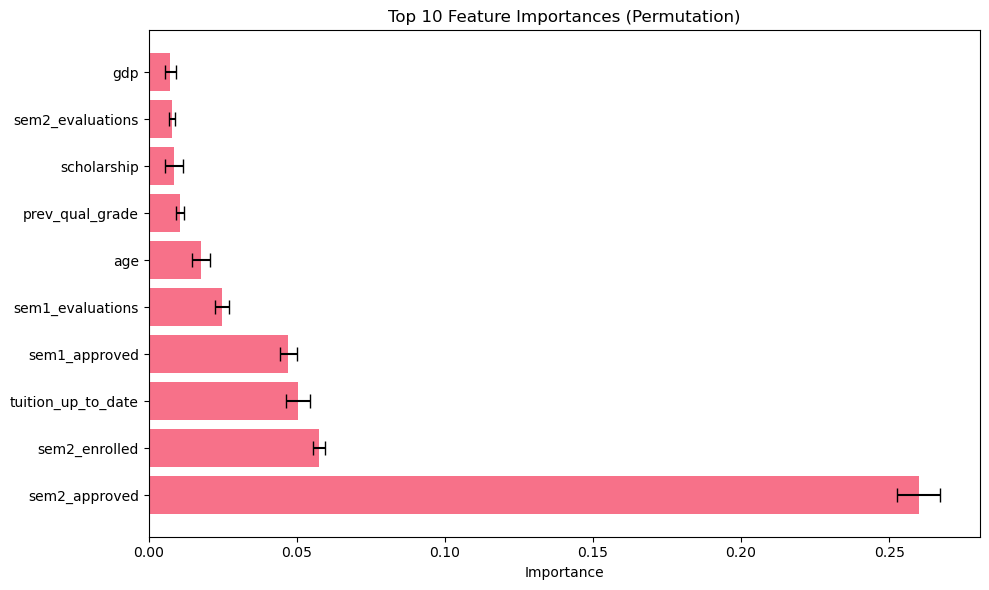

In [29]:
# permutation importance 
from sklearn.inspection import permutation_importance

# get permutation importance
perm_importance = permutation_importance(best_model_dt, X_train, y_train, n_repeats=10, random_state=seed)

# create dataframe of permutation importances
perm_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot top 10 features with error bars
plt.figure(figsize=(10, 6))
top_10 = perm_imp.head(10)
plt.barh(range(len(top_10)), top_10['importance_mean'],
         xerr=top_10['importance_std'], capsize=5)
plt.yticks(range(len(top_10)), top_10['feature'])
plt.title('Top 10 Feature Importances (Permutation)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [30]:
# merge X_train and y_train and then look at y_train values for when sem2_approved is 0
df_train = X_train.copy()

df_train['target'] = y_train

print(df_train[df_train['sem2_approved'] == 0]['target'].value_counts())
print(df_train[df_train['sem1_approved'] == 0]['target'].value_counts())
print(df_train[df_train['tuition_up_to_date'] == 0]['target'].value_counts())

target
Dropout     555
Graduate     60
Enrolled     49
Name: count, dtype: int64
target
Dropout     430
Graduate     61
Enrolled     53
Name: count, dtype: int64
target
Dropout     344
Enrolled     32
Graduate     21
Name: count, dtype: int64


The most important feature categories are:
- the number of curricular units an individual has approved
- tuition status

This makes intuitive sense and is consistent with our analysis in the logistic model. Note that the students who have basically no credits approved for the second semester or have a tuition that is not up to date are almost always dropouts. This variable thus is a pretty strong way for us to distinguish someone as a dropout or not. Interestingly, the 

Less important, though still significant predictors are age (a dropout appears to be more likely to be older given our EDA), scholarship status (more likely to be a graduate given our EDA graph), and their previous qualification grade which all appear to make intuitive sense as important predictors of a student's status.

Finally, we will plot the confusion matrix for this model and get the classification report to see how the model generally performs.

              precision    recall  f1-score   support

     Dropout       0.89      0.70      0.78      1066
    Enrolled       0.49      0.63      0.55       595
    Graduate       0.83      0.87      0.85      1657

    accuracy                           0.77      3318
   macro avg       0.74      0.73      0.73      3318
weighted avg       0.79      0.77      0.78      3318



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

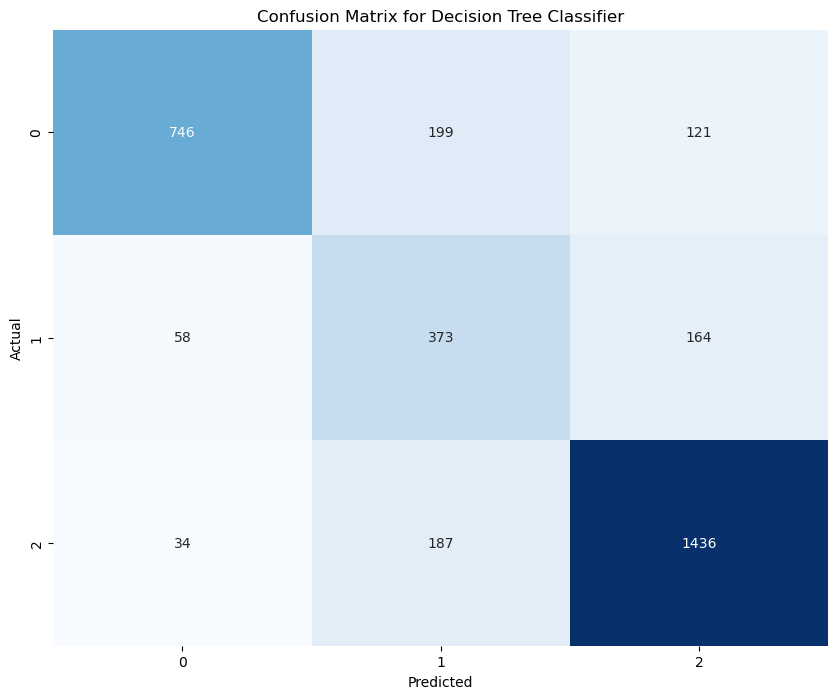

In [31]:
# get classification report 
y_pred = best_model_dt.predict(X_train)

print(classification_report(y_train, y_pred))


# confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix for Decision Tree Classifier')

As with the logistic model, the decision tree does well in classifying individuals as "graduate" or "dropout," but comparatively poorly for "enrolled." This, as explained earlier, is likely related to class imbalance. It could also be that it is simply more difficult to distinguish between an enrollee and a graduate / dropout.

That said, the decision tree performs performs better at classifying all three categories --- dropouts, graduates, and enrolled. This can be seen by comparing the f1-score, which suggests that there is a better precision/recall balance for the decision tree. In particular, the tree seems to perform better with the minority class, which suggests that it might benefit more from SMOTE.

The tree also has a higher precision-recall trade-off variance across classes.

Finally, let's generate our predictions on the test set. 

In [32]:
decision_tree_predictions_df = pd.DataFrame({
    'ID': X_test.index,  # assuming this is the ID you want
    'DT_Predicted': best_model_dt.predict(X_test)
})

decision_tree_predictions_df.to_csv('./submissions/submission_dt.csv', index=False)

In [33]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---


For our custom model, we will train a random forsest. There are several reasons this is likely to improve over our two previous models:
- Random forest is preferable to a single decision tree because it is difficult for a single decision tree to learn complex boundaries without high variance and overfitting. In contrast, random forest, which ensembles multiple different decision trees, can allow for higher depth while limiting variance.
- Random forest is also preferable to bagging because:
    - ensembles of trees in bagging tend to be correlated because most trees will use these same features for early splits. This can lead to overfitting because they make similar errors and thus don't reduce as much variance.
    - Higher tree diversity from random forest can lead to better aggregation which improves generalization (reduction of variance without significantly increasing bias). 

Now, let us train this random forest classifier using the following steps (quite similar to the decision tree classifier since we are simply just running the same model but many times over bootstrapped datasets with predictor subsets at each split):

1. Feature Preprocessing: 
    - Categorical variables
        - One-hot encoded categorical variables into binary predictors
        - No need for dropping first category (tree can handle the redundancy)
        - Justification (same as previous problem)
    
    - Numeric variables 
        - No need for any preprocessing here (same justification as previous problem)

    - Response variables
        - SMOTE to deal with class imbalance as justified in the previous problem.
    
2. Model Selection Process
    - Again, I will use the Entropy score as our criterion for splitting the tree. The higher computational complexity is worth it (for reasons justified before).
    - There are multiple hyperparameters that we need to tune: The number of predictors to randomly select at each split, the total number of trees in the ensemble, and the stopping criteria (max_depth). 
    - The only stopping criteria I will tune in this case is max_depth. This is because ccp_alpha is no longer needed since the ensemble method itself helps deal with issues of overfitting and high variance. The max_leaf_nodes is also unneeded because it is not likely to be that much different from just fitting max_depth parameters given that we are going to be focusing on a complex model anyway (the greater computational complexity is not worth it here). 
    - Hyperparameter values to tune and justification:
        - Max_Depth: (3 to 13 and max with stepsize of 3) -- I decrease the possible depths because a model I had fit earlier with a higher depth overfit the data (perfectly predicted the test set). This is a red flag as it is a signal that the model is likely to not generalize well to some training data. 
        - Number of Trees: (100 to 500, with stepsize of 100). We choose these numbers since generally adding more trees is helpful but only up to a certain point which I expect to be around 500 given the size of our dataset (and further iterations make the computation time of the model too high). 
        - Max_features: (sqrt or log2). Sqrt is the method most long time practicioners use for classification and log2 is another popular method. We will try both.
    - I will choose the combination of hyperparameters that performs best using a out-of-bag error method. I use this over cross validation since with cross validation there is a leakage of data (every validation has been seen in training by a few decision trees and there is thus some form of leakage). OOB prevents leakage and has a lower computation cost. 

3. Final Model Selection and Evaluation
    - The final model will then be chosen as the model that performs best among our candidate models using the metric of out of bag error. 
    - We will then evaluate the model's performance using a confusion matrix and classification report (F1, accuracy, recall scores). 
    - We will also analyze feature importance using permutation importance given its higher robustness than built-in importance as discussed in class.

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# going to define a function to tune our hyperparameters for a random forest using OOB since one does not exist in sklearn

def tune_random_forest(X_train, y_train, params_grid, random_state, preprocessor=None):
    """
    Function to tune a random forest model using OOB error for hyperparameter tuning
    """
    # create vars to store our best params and our best oob score
    best_params = None
    best_oob_score = 0
    results = []

    # iterate through all possible hyperparam combos 
    for max_depth in params_grid.get('max_depth'):
        for n_estimators in params_grid.get('n_estimators'):
            for max_features in params_grid.get('max_features'):
                # initialize our rf model with entropy criterion and our hyperparams
                rf_model = RandomForestClassifier(
                    criterion='entropy',
                    oob_score=True,
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    max_features=max_features,
                    random_state=seed
                )

                # create pipeline making sure to use SMOTE
                model = ImbPipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('smote', SMOTE(random_state=seed)),
                    ('classifier', rf_model)
                ])

                # fit our model
                model.fit(X_train, y_train)

                # get oob score and append to results
                oob_score = model.named_steps['classifier'].oob_score_

                results.append({
                    'max_depth': max_depth,
                    'n_estimators': n_estimators,
                    'max_features': max_features,
                    'oob_score': oob_score
                })
                # if oob_score is better, update our best params
                if oob_score > best_oob_score:
                    best_oob_score = oob_score
                    best_params = {
                        'max_depth': max_depth,
                        'n_estimators': n_estimators,
                        'max_features': max_features
                    }
    return {'best_params': best_params, 'best_oob_score': best_oob_score, 'results': results}




In [36]:
numeric_transformer = 'passthrough'

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output = False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_predictors),
    ('cat', categorical_transformer, categorical_predictors)
])

params_grid = {
    'max_depth': list(range(3, 13, 3)),
    'n_estimators': list(range(100, 500, 100)),
    'max_features': ['sqrt', 'log2'],
}

# to avoid errors
y_train_2 = y_train.values.ravel()

tuned_rf = tune_random_forest(X_train, y_train_2, params_grid, seed, preprocessor)

print("Best parameters:", tuned_rf['best_params'])



Best parameters: {'max_depth': 12, 'n_estimators': 300, 'max_features': 'sqrt'}


In [37]:
# train our best model
rf_model = RandomForestClassifier(
    criterion='entropy',
    n_estimators=tuned_rf['best_params']['n_estimators'],
    max_depth=tuned_rf['best_params']['max_depth'],
    max_features=tuned_rf['best_params']['max_features'],
    random_state=seed
)

model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=seed)),
    ('classifier', rf_model)
])

model.fit(X_train, y_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'unemployment',
                                                   'inflation', 'gdp',
                                                   'prev_qual_grade',
                                                   'admission_grade',
                                                   'sem1_grade',
                                                   'sem1_approved',
                                                   'sem1_enrolled',
                                                   'sem1_evaluations',
                                                   'sem2_grade',
                                                   'sem2_approved',
                                                   'sem2_enrolled',
                                                   'sem2_evaluations']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['gender', 'marital_status',
                                                   'special_needs',
                                                   'international', 'displaced',
                                                   'mother_occ', 'father_occ',
                                                   'debtor',
                                                   'tuition_up_to_date',
                                                   'scholarship'])])),
                ('smote', SMOTE(random_state=109)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=12,
                                        n_estimators=300, random_state=109))])

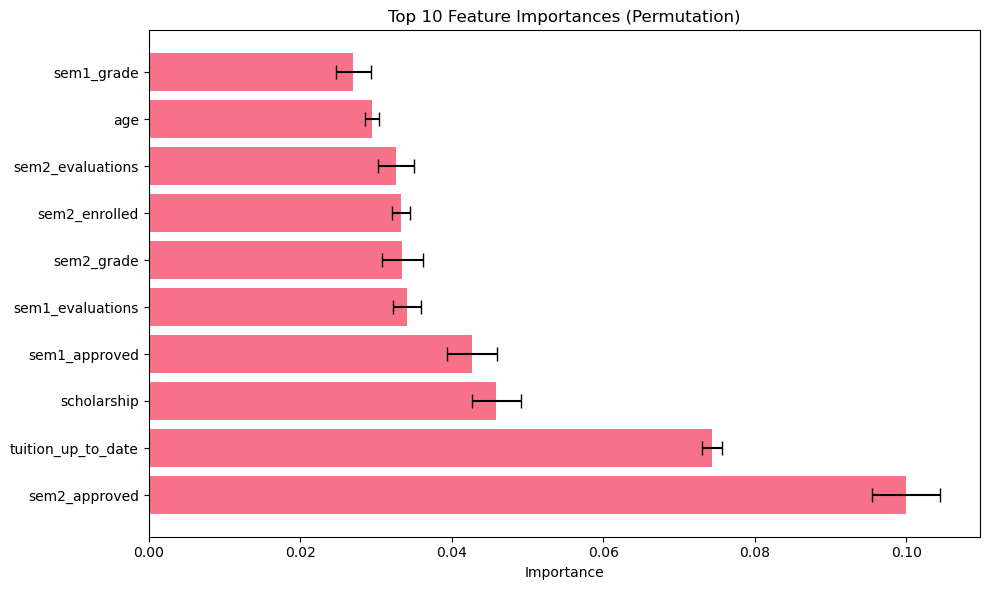

In [38]:
# get our best tree from our pipeline
best_rf = model.named_steps['classifier']

# get permutation importance
perm_importance = permutation_importance(model, X_train, y_train_2, n_repeats=10, random_state=seed)

# Create dataframe of permutation importances
perm_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot top 10 features with error bars
plt.figure(figsize=(10, 6))
top_10 = perm_imp.head(10)
plt.barh(range(len(top_10)), top_10['importance_mean'],
         xerr=top_10['importance_std'], capsize=5)
plt.yticks(range(len(top_10)), top_10['feature'])
plt.title('Top 10 Feature Importances (Permutation)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

We see that our feature importance changed significantly from our initial decision tree in the previous problem. Tuition and semester 2 approved credits are still important features likely due to their ability to predict dropouts. Scholarship appears to be still be quite helpful in predicting those who graduate and is probably the best way the model has to distinguish between enrolled and graduate students. Importantly, though, it seems that features such as age matter more (which was a strong way to figure out if someone was a dropout). However, it appears that a majority of our important features are related to evaluations, grades, and approved/enrolled credits which do appear to distinguish slightly between graduates, dropouts, and enrolled students based on our EDA. 

Now, we will plot the confusion matrix for this model to get the classification report to see how the model generally performs.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

              precision    recall  f1-score   support

     Dropout       0.99      0.89      0.94      1066
    Enrolled       0.85      0.90      0.87       595
    Graduate       0.93      0.97      0.95      1657

    accuracy                           0.93      3318
   macro avg       0.92      0.92      0.92      3318
weighted avg       0.94      0.93      0.93      3318



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

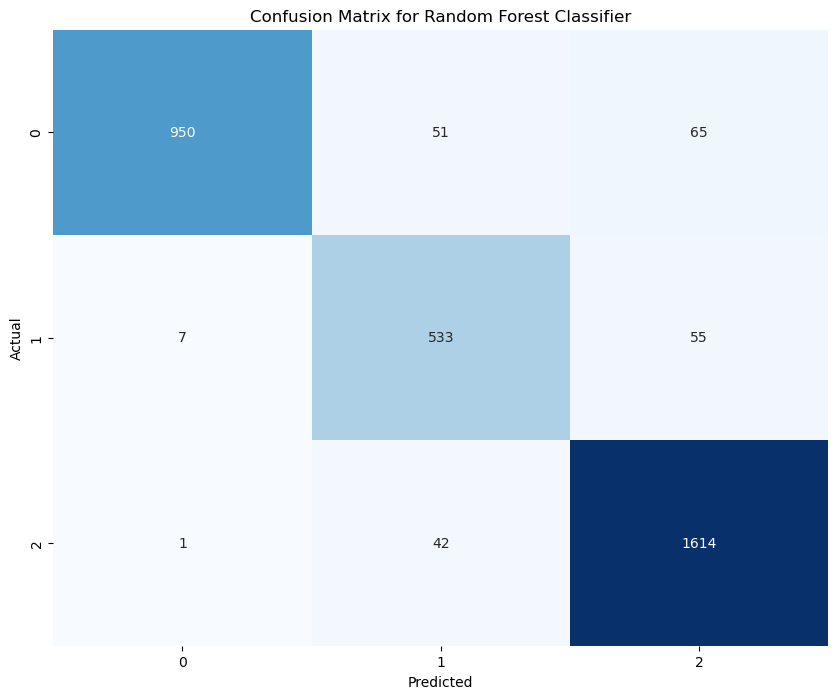

In [39]:
# get classification report
y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix for Random Forest Classifier')

The model, as the models before, performs worse for classifying individuals as enrolled. It appears that the main issue continues to be distinguishing enrolled individuals from graduates, especially given the class imbalance. The precision, f1-scores, and recall scores are entirely better than the decision tree and OvR models which is likely due to the greater complexity of this model and its greater ability to capture smaller nuances/complex decision boundaries in the data. Though, given my previous problems with overfitting for this model, the great performance on the training data is slightly worrying with regard to the generalizability of the model. 

In [40]:
custom_model_predictions = pd.DataFrame({
    'ID': X_test.index,  # assuming this is the ID you want
    'Custom_Predicted': model.predict(X_test)
})

custom_model_predictions.to_csv('./submissions/submission_custom.csv', index=False)

In [41]:
grader.check("custom")

custom results: All test cases passed!

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [42]:
# make a table where we have the F1 score, accuracy for each model
logreg_predictions = best_model_ovr.predict(X_train)
dt_predictions = best_model_dt.predict(X_train)
rf_predictions = model.predict(X_train)

# get the metrics for each model
logreg_f1 = f1_score(y_train, logreg_predictions, average='weighted')
dt_f1 = f1_score(y_train, dt_predictions, average='weighted')
rf_f1 = f1_score(y_train, rf_predictions, average='weighted')

logreg_rec = recall_score(y_train, logreg_predictions, average='weighted')
dt_rec = recall_score(y_train, dt_predictions, average='weighted')
rf_rec = recall_score(y_train, rf_predictions, average='weighted')

# create a dataframe
model_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'F1 Score': [logreg_f1, dt_f1, rf_f1],
    'Recall Score': [logreg_rec, dt_rec, rf_rec]
})

display(model_metrics)

,Model,F1 Score,Recall Score
0,Logistic Regression,0.761850,0.753466
1,Decision Tree,0.775150,0.770042
2,Random Forest,0.933547,0.933394


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

The metrics we will be using to directly compare the models will be the F1 Score and Recall Score for the models. We do not want to use accuracy by itself since we have class imbalance meaning our accuracy can be pretty misleading. Recall is a better measure, in our opinion. Under the recall score, false negatives are more problematic than false positives (i.e. aiming for a high recall score means we are trying to capture as many true positives as possible even at the cost of more false positives). This could be a useful metric for an educational institution that is interested in supporting any student they think may be likely to dropout. Even if they receive some false positives for a dropout, they would rather divert resources to all individuals at risk of dropping out rather tha letting some potential dropouts slip under the radar.

The f1 score is also used as it is a good balance between precision and recall and is a strong metric to capture model performance in the case of class imbalance. It could be that the university does not want to have a false positive for a dropout either since this might lead them to waste resources on a non-dropout and thus a balanced method might be more useful for an institution. 

Based on these metrics, we see that the random performance performs significantly better than both the decision tree and logistic regression. The logistic regression and decision tree models both have quite similar f1 and recall scores, but the logistic regression performs slightly better. As I mentioned earlier, there is a little worry about the overfitting of the random forest model, but I still believe that this is the best model to classify students for reasons I will expound upon below:

First, let us talk about the strengths and weaknesses of the logistic regression model. First, it is much less computationally expensive compared to a random forest. The random forest is also a black-box model that is harder to explain our predictions for while a logistic regression is pretty easy to understand our results. Regularized logistic regression can also handle multicollinearity quite well by shrinking correlated features while the RF or decision tree may perform worse here as thye can provide disproportionate importance to one feature over correlated counterparts. However, the parametric nature of the logistic regression is limited as it cannot easily model more complex decision boundaries like a decision tree or random forest. It is also a less interpretable model in our case given PCA and our polynomial transformations. 

Next, let us talk about the decision tree. The basic strength that the decision tree has over the logistic regression model is that it can model more complex relationships and decision boundaries since it is non-parametric. It is also a very interpretable model and it is easy to receive feature importance from the model. However, the main issue with the decision tree is that it tends to underperform compared to other classification methods when we have complex boundaries or variance since it is hard to model these boundaries without high variance and overfitting. Thus, the model is typically underfit or overfit.

This leads us to the strengths of the random forest. It allows us to deal with the issues of higher variance while allowing the model to take into account more complex decision boundaries without overfitting by using an ensemble method. The trees also used in this ensemble method are supposedly uncorrelated which ensures that certain strong predictors are not overrepresented and also helps build a more generalizable model. It also has the same ability to show feature importance, but is a bit more of a black-box when we get each prediction since it is an average of many trees. In addition, it is very computationally expensive compared to the other methods.

Still, given RF's ability to deal with nonlinear relationships, its generally strong interpretability, and its ability to generalize given its ensemble foundation, RF is still the best model in our opinion.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [43]:
# 
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

These models could be used by educational institutions in order to best support students they think are at risk of dropping out. They can classify a student as likely to drop out and then provide them with extra resources throughout their transition to college to make sure they have the ability to succeed. They could also use this data to better admit students who are likely to graduate. They could, for example, look at the important features that distinguish a graduate from a drop out and use those to make better admissions decisions. 

The pset was quite long and explaining the entire process of building the model from the start was most challenging. It felt a little bit like doing the CS109a project during a homework.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [44]:
hours_spent_on_hw = 12

In [45]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [46]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 3.04 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
